# Capstone Project: Compare Consumer Sentiments of Apple, Google, and Android from Past to Present

**Instructor:**James Irving <br>
**Date:**7/23/21

**Business Problem:** For better or worse, people's perception of tech giants have changed over time. A company that consults these large companies' PR teams have hired me to find how the consumers' sentiments have changed. To gather the necessary information, I am going to go to Twitter, and I will compare the public's emotion towards these companies using vader sentiment analysis.

In [246]:
import tweepy as tw
import os
import pandas as pd
import json
import csv
from datetime import date
from datetime import datetime
import time
import numpy as np
import re
import html
import matplotlib.pyplot as plt
import string
import streamlit as st
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

import nltk
from nltk import tokenize
from nltk.probability import FreqDist
from nltk.tokenize import TweetTokenizer, word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords, subjectivity
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')


from wordcloud import WordCloud

import spacy
import sklearn
print(sklearn.__version__)
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

0.24.1


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yslim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yslim\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yslim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yslim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [247]:
# Add business problem and lay those things out so that I know what to talk about during presentation
# and what i should focus on

## Data Cleaning

In [248]:
# Comment on what I did and why I did it ex) why I changed the column names

In [249]:
tweet=pd.read_csv('data/tweet.csv')
tweet.head()

created_at                   id            id_string  \
0  Fri Jul 09 15:55:27 +0000 2021  1413527226071588868  1413527226071588868   
1  Fri Jul 09 15:55:26 +0000 2021  1413527223252832257  1413527223252832257   
2  Fri Jul 09 15:55:26 +0000 2021  1413527223194226691  1413527223194226691   
3  Fri Jul 09 15:55:26 +0000 2021  1413527222221111302  1413527222221111302   
4  Fri Jul 09 15:55:26 +0000 2021  1413527222145724419  1413527222145724419   

                                                                                                                                                                                                                                                                                                                          full_text  
0                                                                                                                      the fact that apple doesn’t sync the contacts you blocked on your phone to your mac is sick. this man messaged me and it came thru to my laptop and for the paat two days i’ve been debating cursing him out  
1                                                                                                                                                                                                                                        j-armys doing the most for apple music  yall pls stream there too  https://t.co/8z0RSfJdlf  
2  Here’s some of the Draft picks made in the Combo’s Court Mock Draft:\r\n\r\n1.) Pistons - Cade Cunningham\r\n\r\n6.) Thunder - James Bouknight \r\n\r\n9.) Kings - Jalen Johnson\r\n\r\nOdd Numbers Drafted by @dmurrayNBA \r\n\r\nEven Numbers Drafted by \r\n@comboscourt \r\n\r\nFull episode:\r\n\r\nhttps://t.co/1wQRaN7J8S  
3                                                                                                                                                                                                    10 July 2021\r\nmidoukou128 got into bed.\r\nTime 00:55, Alarm set 6.5 hours of sleep\r\n#SleepMeister https://t.co/G6WANHNm1F  
4                                                                                                                                                                                                                                                                                          @Etrouse  cinnamon apple!!!! I felt that

In [250]:
pd.set_option('max_colwidth', None)
tweet[['created_at', 'id_string','full_text']]

created_at            id_string  \
0     Fri Jul 09 15:55:27 +0000 2021  1413527226071588868   
1     Fri Jul 09 15:55:26 +0000 2021  1413527223252832257   
2     Fri Jul 09 15:55:26 +0000 2021  1413527223194226691   
3     Fri Jul 09 15:55:26 +0000 2021  1413527222221111302   
4     Fri Jul 09 15:55:26 +0000 2021  1413527222145724419   
...                              ...                  ...   
4495  Thu Jul 08 20:50:04 +0000 2021  1413238982574542848   
4496  Thu Jul 08 20:49:00 +0000 2021  1413238713136648195   
4497  Thu Jul 08 20:48:50 +0000 2021  1413238670765740040   
4498  Thu Jul 08 20:48:32 +0000 2021  1413238594278465551   
4499  Thu Jul 08 20:48:31 +0000 2021  1413238590436429826   

                                                                                                                                                                                                                                                                                                                             full_text  
0                                                                                                                         the fact that apple doesn’t sync the contacts you blocked on your phone to your mac is sick. this man messaged me and it came thru to my laptop and for the paat two days i’ve been debating cursing him out  
1                                                                                                                                                                                                                                           j-armys doing the most for apple music  yall pls stream there too  https://t.co/8z0RSfJdlf  
2     Here’s some of the Draft picks made in the Combo’s Court Mock Draft:\r\n\r\n1.) Pistons - Cade Cunningham\r\n\r\n6.) Thunder - James Bouknight \r\n\r\n9.) Kings - Jalen Johnson\r\n\r\nOdd Numbers Drafted by @dmurrayNBA \r\n\r\nEven Numbers Drafted by \r\n@comboscourt \r\n\r\nFull episode:\r\n\r\nhttps://t.co/1wQRaN7J8S  
3                                                                                                                                                                                                       10 July 2021\r\nmidoukou128 got into bed.\r\nTime 00:55, Alarm set 6.5 hours of sleep\r\n#SleepMeister https://t.co/G6WANHNm1F  
4                                                                                                                                                                                                                                                                                             @Etrouse  cinnamon apple!!!! I felt that  
...                                                                                                                                                                                                                                                                                                                                ...  
4495                                                                                                                                                                                                                                               #Samsung Galaxy now supported #revit #coronarender #android https://t.co/XSSKvJ1ZOI  
4496                                                                                                                                                                          King Chase - Taking My Time Download the app on #Android \r\nComing soon to #ios #Cookupradio  Repost\r\n your music when you see it. #IndependentArtist  
4497                                                                                                                                                                                                                                                                  @Apple @Android ADD THIS EMOJI PLEASE!!! https://t.co/w7Gls1NaBI  
449

In [251]:
old_tweet_df=pd.read_csv('data/tweet_product_company.csv', encoding='latin_1')
old_tweet_df.head()

tweet_text  \
0              .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
1  @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                              @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                           @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
4          @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion

In [252]:
# First we need to see if there are tweets that have no text and were able to find one tweet without any text
old_tweet_df.loc[old_tweet_df['tweet_text'].isna()]

tweet_text emotion_in_tweet_is_directed_at  \
6        NaN                             NaN   

  is_there_an_emotion_directed_at_a_brand_or_product  
6                 No emotion toward brand or product

In [253]:
old_tweet_df.dropna(subset=['tweet_text'], inplace=True)
old_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


In [254]:
#Changed the column names since they were long and seemed unnecessary
change_dict={'emotion_in_tweet_is_directed_at':'product or company', 
             'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'}
old_tweet_df.rename(columns=change_dict, inplace=True)
old_tweet_df

tweet_text  \
0                       .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
1           @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                                       @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                                    @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
4                   @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)   
...                                                                                                                                                 ...   
9088                                                                                                                      Ipad everywhere. #SXSW {link}   
9089                      Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link}  #google #circles   
9090  Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev   
9091       Some Verizon iPhone customers complained their time fell back an hour this weekend.  Of course they were the New Yorkers who attended #SXSW.   
9092                                           Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @mention Google Tests ÛÏCheck-in OffersÛ At #SXSW {link}   

      product or company                             emotion  
0                 iPhone                    Negative emotion  
1     iPad or iPhone App                    Positive emotion  
2                   iPad                    Positive emotion  
3     iPad or iPhone App                    Negative emotion  
4                 Google                    Positive emotion  
...                  ...                                 ...  
9088                iPad                    Positive emotion  
9089                 NaN  No emotion toward brand or product  
9090                 NaN  No emotion toward brand or product  
9091                 NaN  No emotion toward brand or product  
9092                 NaN  No emotion toward brand or product  

[9092 rows x 3 columns]

In [255]:
# We want to know what kind of emotion and the number of emotions shown in the tweets
old_tweet_df['emotion'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotion, dtype: int64

In [256]:
# Because the emotions were labeled as "I can't tell", pandas didn't recognize it as missing values
old_tweet_df[old_tweet_df['emotion'].isna()]

Empty DataFrame
Columns: [tweet_text, product or company, emotion]
Index: []

In [257]:
# Here I wanted to see what companies and how many companies/brands there were per emotion
old_tweet_df.groupby(by=['emotion', 'product or company'], dropna=False).count()


tweet_text
emotion                            product or company                         
I can't tell                       Apple                                     2
                                   Google                                    1
                                   Other Google product or service           1
                                   iPad                                      4
                                   iPhone                                    1
                                   NaN                                     147
Negative emotion                   Android                                   8
                                   Android App                               8
                                   Apple                                    95
                                   Google                                   68
                                   Other Apple product or service            2
                                   Other Google product or service          47
                                   iPad                                    125
                                   iPad or iPhone App                       63
                                   iPhone                                  103
                                   NaN                                      51
No emotion toward brand or product Android                                   1
                                   Android App                               1
                                   Apple                                    21
                                   Google                                   15
                                   Other Apple product or service            1
                                   Other Google product or service           9
                                   iPad                                     24
                                   iPad or iPhone App                       10
                                   iPhone                                    9
                                   NaN                                    5297
Positive emotion                   Android                                  69
                                   Android App                              72
                                   Apple                                   543
                                   Google                                  346
                                   Other Apple product or service           32
                                   Other Google product or service         236
                                   iPad                                    793
                                   iPad or iPhone App                      397
                                   iPhone                                  184
                                   NaN                                     306

In [258]:
#We are creating a dataframe that contains all duplications where the value for product or company is missing
duplications=old_tweet_df.duplicated(subset=['tweet_text'], keep='first')
old_tweet_df[duplications]

tweet_text  \
468                                                                                                     Before It Even Begins, Apple Wins #SXSW {link}   
776                                                              Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw   
2232                                                Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw   
2559                                                          Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear   
3813                                                                                                          Win free ipad 2 from webdoc.com #sxsw RT   
3814                                                                                                          Win free iPad 2 from webdoc.com #sxsw RT   
3950  Really enjoying the changes in Gowalla 3.0 for Android! Looking forward to seeing what else they &amp; Foursquare have up their sleeves at #SXSW   
3962        #SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan   
4897                   Oh. My. God. The #SXSW app for iPad is pure, unadulterated awesome. It's easier to browse events on iPad than on the website!!!   
5338                                          RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter   
5341                     RT @mention ÷¼ Happy Woman's Day! Make love, not fuss! ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter   
5881                                                 RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw   
5882                                                 RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #SXSW   
5883                                                 RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw   
5884                                                 RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #SXSW   
5885                                                 RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw   
6294                                    RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw   
6295                                    RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW   
6296                                    RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw   
6297                                    RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW   
6298                                    RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw   
6299                                    RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW   
6300                                    RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw   
6546                                     RT @mention RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw   
6576         RT @mention RT @mention It's not a rumor: Apple is opening up a temporary store in downtown Austin for #SXSW and the iPad 2 launch {link}   
8483                  I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning?

In [259]:
clean_old_df=old_tweet_df.loc[~duplications].copy()
clean_old_df

tweet_text  \
0                       .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
1           @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                                       @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                                    @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
4                   @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)   
...                                                                                                                                                 ...   
9088                                                                                                                      Ipad everywhere. #SXSW {link}   
9089                      Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link}  #google #circles   
9090  Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev   
9091       Some Verizon iPhone customers complained their time fell back an hour this weekend.  Of course they were the New Yorkers who attended #SXSW.   
9092                                           Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @mention Google Tests ÛÏCheck-in OffersÛ At #SXSW {link}   

      product or company                             emotion  
0                 iPhone                    Negative emotion  
1     iPad or iPhone App                    Positive emotion  
2                   iPad                    Positive emotion  
3     iPad or iPhone App                    Negative emotion  
4                 Google                    Positive emotion  
...                  ...                                 ...  
9088                iPad                    Positive emotion  
9089                 NaN  No emotion toward brand or product  
9090                 NaN  No emotion toward brand or product  
9091                 NaN  No emotion toward brand or product  
9092                 NaN  No emotion toward brand or product  

[9065 rows x 3 columns]

In [260]:
# Tell why i did this
# Here I want to see the number of each emotions where the product or company's values is missing.
# Now we can see that most of the tweets that do not have a company show no emotion (neutral emotion)
clean_old_df[clean_old_df['product or company'].isna()]['emotion'].value_counts()

No emotion toward brand or product    5281
Positive emotion                       306
I can't tell                           147
Negative emotion                        51
Name: emotion, dtype: int64

In [261]:
# Lump apple products as Apple instead of having different products
# This is still cleaning for the older tweets
brands2={'Google':'Google', 'Apple' : 'Apple', 'Android': 'Android', 'iPad':'Apple', 'i-pad':'Apple' ,'iPhone': 'Apple'}
for key, values in brands2.items():
    clean_old_df.loc[clean_old_df['tweet_text'].str.contains(key, case=False), 'product or company']= values

In [262]:
# After running the for loop above, we can see a clear decrease in the number of tweets 
# that do not contain a company or product
clean_old_df[clean_old_df['product or company'].isna()]['emotion'].value_counts()

No emotion toward brand or product    739
Positive emotion                       13
I can't tell                            6
Negative emotion                        1
Name: emotion, dtype: int64

In [263]:
clean_old_df

tweet_text  \
0                       .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
1           @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                                       @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                                    @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
4                   @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)   
...                                                                                                                                                 ...   
9088                                                                                                                      Ipad everywhere. #SXSW {link}   
9089                      Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link}  #google #circles   
9090  Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev   
9091       Some Verizon iPhone customers complained their time fell back an hour this weekend.  Of course they were the New Yorkers who attended #SXSW.   
9092                                           Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @mention Google Tests ÛÏCheck-in OffersÛ At #SXSW {link}   

     product or company                             emotion  
0                 Apple                    Negative emotion  
1                 Apple                    Positive emotion  
2                 Apple                    Positive emotion  
3                 Apple                    Negative emotion  
4                Google                    Positive emotion  
...                 ...                                 ...  
9088              Apple                    Positive emotion  
9089             Google  No emotion toward brand or product  
9090             Google  No emotion toward brand or product  
9091              Apple  No emotion toward brand or product  
9092             Google  No emotion toward brand or product  

[9065 rows x 3 columns]

In [264]:
# Though I have already seen the total number of tweets without a product or company, I wanted to
# double check and make sure that the tweets indeed did not contain a company or product name
clean_old_df[clean_old_df['product or company'].isna()]

tweet_text  \
51            ÛÏ@mention {link} &lt;-- HELP ME FORWARD THIS DOC to all Anonymous accounts, techies,&amp; ppl who can help us JAM #libya #SXSW   
52                                                             ÷¼ WHAT? ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter   
53                                                .@mention @mention on the location-based 'fast, fun and future' - {link} (via @mention #sxsw   
66                                                    At #sxsw? @mention / @mention wanna buy you a drink. 7pm at Fado on 4th. {link} Join us!   
71    Chilcott: @mention #SXSW stand talking with Blogger staff. Too late to win competition for best tweet mentioning @mention So no t-shirt.   
...                                                                                                                                        ...   
8932                                                 Z6: No News is Good News {link} [codes valid: 4:00-7:59:59p 03/11/11] #infektd #sxsw #zlf   
8936                                CLIENT NEWS! @mention Releases &quot;Dope Melodies &amp; Heavy Bass&quot; &amp; Invades #SXSW -&gt; {link}   
8970                                           This is my 5th year downloading the #sxsw Music Torrent {link} ALL FREE and LEGAL! Great Music.   
9024                                           by the way, we're looking for a spanish-speaking trend scout based in Austin -&gt; {link} #sxsw   
9026                  True story! RT @mention I just rated Amy's Ice Cream 5 stars. @mention &quot;Best ice cream in town!!&quot; {link} #sxsw   

     product or company                             emotion  
51                  NaN  No emotion toward brand or product  
52                  NaN  No emotion toward brand or product  
53                  NaN  No emotion toward brand or product  
66                  NaN  No emotion toward brand or product  
71                  NaN  No emotion toward brand or product  
...                 ...                                 ...  
8932                NaN  No emotion toward brand or product  
8936                NaN  No emotion toward brand or product  
8970                NaN  No emotion toward brand or product  
9024                NaN  No emotion toward brand or product  
9026                NaN  No emotion toward brand or product  

[759 rows x 3 columns]

In the next two lines of code, I am just repeating the above process but just looking at it in more detail for positive and negative emotions.


In [265]:
# tell what i was looking for/ why i did this for basically most of the lines
clean_old_df.loc[(clean_old_df['emotion']=='Positive emotion') & (clean_old_df['product or company'].isna())]

tweet_text  \
619                @mention  hello! Enjoy #Sxsw and ride anywhere in Austin for $10 . download the #GroundLink app, {link} booth 437   
1366                                             @mention - spread the word, our #SXSW festival explorer App is live and free {link}   
2258                                                @mention be sure to use our FREE App for checking out the bands at #SXSW! {link}   
3034                                                     Free iTunes Album, #SXSW Featured Artists, grab it if you missed it: {link}   
3747                                                 {link} Coinsidence? Sounds like a good strategy to me. Wish I could go to #SXSW   
4237                                                                          @mention Luckily @mention has a pop up store at #SXSW!   
5613                        RT @mention Check out the new @mention app {link} - this is gonna be HUGE next week at #sxsw and beyond.   
5746                                         RT @mention Free iTunes Album, #SXSW Featured Artists, grab it if you missed it: {link}   
6676                                            RT @mention Soundtrckr featured by @mention @mention as a Must-have for #SXSW {link}   
7825     Watch this @mention #sxsw - #ecademy @mention {link} &gt;&gt; fascinating &amp; so true about maps saving itme - lots of it   
8196  Friends at #sxsw, can you take some 360 views with 360 Panorama - {link} - so I feel like I'm there? I'll gift you the app =)!   
8811                                                                This #sxsw app by #MxM is made of AWESOME! --  {link}   --{link}   
8835                                                                                  Free #SXSW sampler on iTunes {link} #FreeMusic   

     product or company           emotion  
619                 NaN  Positive emotion  
1366                NaN  Positive emotion  
2258                NaN  Positive emotion  
3034                NaN  Positive emotion  
3747                NaN  Positive emotion  
4237                NaN  Positive emotion  
5613                NaN  Positive emotion  
5746                NaN  Positive emotion  
6676                NaN  Positive emotion  
7825                NaN  Positive emotion  
8196                NaN  Positive emotion  
8811                NaN  Positive emotion  
8835                NaN  Positive emotion

In [266]:
clean_old_df.loc[(clean_old_df['emotion']=='Negative emotion') & (clean_old_df['product or company'].isna())]

tweet_text  \
7561  Apps distract pubs, sez Khoi Vinh. Instead of focusing on reader exp, they're delivering same content 3 ways. #SXSW  {link}   

     product or company           emotion  
7561                NaN  Negative emotion

In [267]:
# I have noticed that most of the tweets that used to contain a link had a {link} place holder.
# However, I wasn't sure if all of the links were replaced with the place holder.
clean_old_df[clean_old_df['tweet_text'].str.contains("http[^ ]+|www\.[^ ]+")]

tweet_text  \
5              @teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd   
8                         Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB   
11                        Find &amp; Start Impromptu Parties at #SXSW With @HurricaneParty http://bit.ly/gVLrIn I can't wait til the Android app comes out.   
12                    Foursquare ups the game, just in time for #SXSW http://j.mp/grN7pK) - Still prefer @Gowalla by far, best looking Android app to date.   
13           Gotta love this #SXSW Google Calendar featuring top parties/ show cases to check out.  RT @hamsandwich via @ischafer =&gt;http://bit.ly/aXZwxB   
14                                                                                        Great #sxsw ipad app from @madebymany: http://tinyurl.com/4nqv92l   
15                                                                       haha, awesomely rad iPad app by @madebymany http://bit.ly/hTdFim #hollergram #sxsw   
16                                                             Holler Gram for iPad on the iTunes App Store -  http://t.co/kfN3f5Q (via @marc_is_ken) #sxsw   
19                                   Must have #SXSW app! RT @malbonster: Lovely review from Forbes for our SXSW iPad app Holler Gram - http://t.co/g4GZypV   
23                                                           Photo: Just installed the #SXSW iPhone app, which is really nice! http://tumblr.com/x6t1pi6av7   
26                                              RT haha, awesomely rad iPad app by @madebymany http://bit.ly/hTdFim #hollergram #sxsw (via @michaelpiliero)   
28              The new #4sq3 looks like it is going to rock. Update for iPhone and Android should push tonight http://bit.ly/etsbZk #SXSW #KeepAustinWeird   
30                                      Very smart from @madebymany #hollergram iPad app for #sxsw! http://t.co/A3xvWc6 (may leave my vuvuzela at home now)   
31                   You must have this app for your iPad if you are going to #SXSW http://itunes.apple.com/us/app/holler-gram/id420666439?mt=8 #hollergram   
272                          Surprise! Apple has opened a pop-up store in Austin so that the nerds in town for #SXSW can get their new iPads. http:/ {link}   
293               A special Apple store: opening at 6th and Congress for SXSW &amp; ipad 2 launch. www.apple.com/retail/thedomain/  #Apple #iPad2 #sxsw #fb   
1133                              Check out the @mention Route {link} ; RSVP here -&gt; https://www.facebook.com/event.php?eid=141164002609303 #sxswi #sxsw   
1139                                                                       Pics from the #apple #ipad2 line at #SXSW #fb  {link} {link} http://t.co/26SVO3m   
1241                                                   Apple set to open popup shop in core of SXSW action {link} #sxsw #app... {link} http://bit.ly/bvHD5s   
1758                   I'll pay $681.00 for a New, Unopened iPad 2 16GB with 3G for Verizon - Black. Visit www.Zaarly.com to claim the cash. #willpay #sxsw   
2736                                     Front Gate Tickets Present The Morning After Party 3/18 https://sites.google.com/site/frontgatesxsw11/ #SXSW Music   
3511                                                             At #tweethouse watching #ipad dj @mention rock out at #sxsw! Check out www.rana.co! #dotco   
4962               Off to Google party with @mention then @mention @mention @mention at www.getdown.com #msusxsw #sxsw Tweet me if you're there! (@jeremie)   
5002                         RT The coolest iPhone 4 &amp; iPad cases at #Sxsw, check them out here at #fastcompanygrill #zazzlesxsw #sxswi  http... {link}   
5130                                 RT @mention @mention hey Rudy, are Belgiums and Dutch taking over #sxsw? We launched www.skylines.net and {link} today   
5370  RT @m

Unfortunately, my concern was true.<br>
The next code will look for special characters as they will need to be replaced before performing the vader sentiment analysis.

In [268]:
clean_old_df[clean_old_df['tweet_text'].str.contains('[^\x00-\x7F]+')]


tweet_text  \
38                                       @mention  - False Alarm: Google Circles Not Coming NowÛÒand Probably Not Ever? - {link} #Google #Circles #Social #SXSW   
41                              HootSuite - HootSuite Mobile for #SXSW ~ Updates for iPhone, BlackBerry &amp; Android: Whether youÛªre getting friend... {link}   
42                             Hey #SXSW - How long do you think it takes us to make an iPhone case? answer @mention using #zazzlesxsw and weÛªll make you one!   
45                                                  #IPad2 's Û÷#SmartCoverÛª Opens to Instant Access - I should have waited to get one! - {link} #apple #SXSW   
46                                                                   Hand-Held Û÷HoboÛª: Drafthouse launches Û÷Hobo With a ShotgunÛª iPhone app #SXSW {link}   
...                                                                                                                                                          ...   
8925                                              umm that would be @mention ÛÏ@mention I keep winning shit! Thanks @mention for the killer iPad case. #sxswÛ   
8945                            FestivalExplorer iPhone App Finally Solves SXSW {link} #music #musica #musiek #musique #musik #app #sxsw #Ù_¾¬â #Ù_¾´_ #Î¥É   
8963                                                     Group #Texting War Heats Up: Fast Society Launches New Android App, Updates iPhone App: #SXSWÛ_ {link}   
8982  In case my fairy god mother = reading mail; my ÌÙ±G wish this week is 2 go 2 #sxsw Ï for the #Android ÏÎ Dev Ïà Meetup. @mention Hilton, Sat. 12:30PM   
9092                                                    Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @mention Google Tests ÛÏCheck-in OffersÛ At #SXSW {link}   

     product or company                             emotion  
38               Google                    Negative emotion  
41                Apple  No emotion toward brand or product  
42                Apple  No emotion toward brand or product  
45                Apple                    Positive emotion  
46                Apple                    Positive emotion  
...                 ...                                 ...  
8925              Apple                    Positive emotion  
8945              Apple                    Positive emotion  
8963              Apple                    Positive emotion  
8982            Android  No emotion toward brand or product  
9092             Google  No emotion toward brand or product  

[483 rows x 3 columns]

There were more number of tweets containing urls and special characters than I had initially expected. So I will need to create a function that will be able to remove special characters including emojis and other punctuation marks. The function will also replace all urls with the {link} place holder, but because I do not want the place holder to have an impact later on the word clouds, the place holders are will also be removed.

In [269]:
# Don't want any http or www. to have influence on word cloud later.
# First we will remove all non ascii characters
# Then we will remove the control characters
# Realized that standalone numbers should be removed as well
# Remove retweets, mentions, and hashtags
# Finally we have to remove unnecessary spaces

def text_cleaner(text):
    text=html.unescape(text)
    
    #remove links and urls
    links=re.findall("http[^ ]+|www\.[^ ]+", text)
    for link in links:
        text=str.replace(text, link, '{link}')
    text = re.sub('{link}', ' ', text)
    # this will remove all non-ascii
    text = re.sub(r'[^\x00-\x7F]+',' ', text)
    # remove control characters
    text = re.sub('[\x00-\x1F]',' ', text)
    # remove stand-alone numbers
#     text = ' '.join(word for word in text.split() if not word.isdigit())
    text= re.sub(r'\d', ' ', text)
    # retweets
    text = re.sub(r'RT [@]?\w*:',' ', text)
    text = re.sub('RT',' ', text)
    #mentions
    text = re.sub(r'\@\w*', ' ', text)
    # hashtags
    text = re.sub(r'\#\w*',' ', text)
    # remove unnecessary spaces
    text = re.sub(' +', ' ', text)
    return text

In [270]:
# For some reason, there was a period at the very front of the first tweet, and it was not removed by the text cleaner
# function. Because of this, I am just removing the period with the first line of code.
clean_old_df['tweet_text'][0]=clean_old_df['tweet_text'][0][1:]

# We are applying the text cleaner function using map lambda and creating a new column called clean_text.
# This column will be the same as the original text without special characters and other unwatned strings
clean_old_df['clean_text'] = clean_old_df['tweet_text'].map(lambda x: text_cleaner(x))

In [271]:
# Now we want to make sure that our text cleaner function has performed its task
clean_old_df[clean_old_df['clean_text'].str.contains('[^\x00-\x7F]+')]

Empty DataFrame
Columns: [tweet_text, product or company, emotion, clean_text]
Index: []

In [272]:
clean_old_df

tweet_text  \
0                        @wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
1           @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                                       @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                                    @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
4                   @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)   
...                                                                                                                                                 ...   
9088                                                                                                                      Ipad everywhere. #SXSW {link}   
9089                      Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link}  #google #circles   
9090  Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev   
9091       Some Verizon iPhone customers complained their time fell back an hour this weekend.  Of course they were the New Yorkers who attended #SXSW.   
9092                                           Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @mention Google Tests ÛÏCheck-in OffersÛ At #SXSW {link}   

     product or company                             emotion  \
0                 Apple                    Negative emotion   
1                 Apple                    Positive emotion   
2                 Apple                    Positive emotion   
3                 Apple                    Negative emotion   
4                Google                    Positive emotion   
...                 ...                                 ...   
9088              Apple                    Positive emotion   
9089             Google  No emotion toward brand or product   
9090             Google  No emotion toward brand or product   
9091              Apple  No emotion toward brand or product   
9092             Google  No emotion toward brand or product   

                                                                                                                                  clean_text  
0                                            I have a G iPhone. After hrs tweeting at , it was dead! I need to upgrade. Plugin stations at .  
1                        Know about ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at   
2                                                                                     Can not wait for also. They should sale them down at .  
3                                                                    I hope this year's festival isn't as crashy as this year's iPhone app.   
4                            great stuff on Fri : Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) & Matt Mullenweg (Wordpress)  
...                                                                                                                                      ...  
9088                                                                                                                       Ipad everywhere.   
9089                                                     Wave, buzz... We interrupt your regularly scheduled geek programming with big news   
9090               Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. "We're operating w/out data." dev  
9091  Some Verizon iPhone customers complained their time fell back an hour this weekend. Of 

In [273]:
# Checking the percentage of tweets that do not contain a product or company since these tweets are not needed.
# If the number of tweets missing a company is small enough, they will be dropped. 
clean_old_df['product or company'].isna().sum()/len(clean_old_df)


0.08372862658576945

In [274]:
no_company=clean_old_df['product or company'].isna()
clean_old_df[no_company]

tweet_text  \
51            ÛÏ@mention {link} &lt;-- HELP ME FORWARD THIS DOC to all Anonymous accounts, techies,&amp; ppl who can help us JAM #libya #SXSW   
52                                                             ÷¼ WHAT? ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter   
53                                                .@mention @mention on the location-based 'fast, fun and future' - {link} (via @mention #sxsw   
66                                                    At #sxsw? @mention / @mention wanna buy you a drink. 7pm at Fado on 4th. {link} Join us!   
71    Chilcott: @mention #SXSW stand talking with Blogger staff. Too late to win competition for best tweet mentioning @mention So no t-shirt.   
...                                                                                                                                        ...   
8932                                                 Z6: No News is Good News {link} [codes valid: 4:00-7:59:59p 03/11/11] #infektd #sxsw #zlf   
8936                                CLIENT NEWS! @mention Releases &quot;Dope Melodies &amp; Heavy Bass&quot; &amp; Invades #SXSW -&gt; {link}   
8970                                           This is my 5th year downloading the #sxsw Music Torrent {link} ALL FREE and LEGAL! Great Music.   
9024                                           by the way, we're looking for a spanish-speaking trend scout based in Austin -&gt; {link} #sxsw   
9026                  True story! RT @mention I just rated Amy's Ice Cream 5 stars. @mention &quot;Best ice cream in town!!&quot; {link} #sxsw   

     product or company                             emotion  \
51                  NaN  No emotion toward brand or product   
52                  NaN  No emotion toward brand or product   
53                  NaN  No emotion toward brand or product   
66                  NaN  No emotion toward brand or product   
71                  NaN  No emotion toward brand or product   
...                 ...                                 ...   
8932                NaN  No emotion toward brand or product   
8936                NaN  No emotion toward brand or product   
8970                NaN  No emotion toward brand or product   
9024                NaN  No emotion toward brand or product   
9026                NaN  No emotion toward brand or product   

                                                                                                            clean_text  
51                          <-- HELP ME FORWARD THIS DOC to all Anonymous accounts, techies,& ppl who can help us JAM   
52                                                                                                          WHAT? _ _   
53                                                              . on the location-based 'fast, fun and future' - (via   
66                                                            At ? / wanna buy you a drink. pm at Fado on th. Join us!  
71    Chilcott: stand talking with Blogger staff. Too late to win competition for best tweet mentioning So no t-shirt.  
...                                                                                                                ...  
8932                                                           Z : No News is Good News [codes valid: : - : : p / / ]   
8936                                                  CLIENT NEWS! Releases "Dope Melodies & Heavy Bass" & Invades ->   
8970                                 This is my th year downloading the Music Torrent ALL FREE and LEGAL! Great Music.  
9024                                  by the way, we're looking for a spanish-speaking trend scout based in Austin ->   
9026                                       True story! I just rated Amy's Ice Cream stars. "Best ice cream in town!!"   

[759 rows x 4 columns]

In [275]:
# Dropping rows without company or products as the number/percentage was small. 
# Decreased from 9058 rows to 8301 rows.
clean_old_df2=clean_old_df[~no_company].copy()
clean_old_df2=clean_old_df2.drop(columns=['tweet_text'])

In [276]:
# Since there were multiple products that were related to the same company, the products' names were changed
# to that of the main company's names so that comparing them would be easier.
brands={'iPad or iPhone App': 'Apple', 'Other Apple product or service': 'Apple', 
        'Other Google product or service':'Google'}

for key, values in brands.items():
    clean_old_df2.loc[clean_old_df2['product or company'].str.contains(key), 'product or company']=values

In [277]:
for text in clean_old_df2['clean_text']:
    text=str.replace(text,'{link}', '')

#     text=re.sub('{link}','',text)
clean_old_df2['clean_text']
# clean_old_df2['clean_text']=re.sub('{link}', '',clean_old_df2['clean_text'])

0                                              I have a G iPhone. After hrs tweeting at , it was dead! I need to upgrade. Plugin stations at .
1                          Know about ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at 
2                                                                                       Can not wait for also. They should sale them down at .
3                                                                      I hope this year's festival isn't as crashy as this year's iPhone app. 
4                              great stuff on Fri : Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) & Matt Mullenweg (Wordpress)
                                                                         ...                                                                  
9088                                                                                                                         Ipad everywhere. 

#### New Tweet
Now we want to clean the newer tweets collected using tweepy.

In [278]:
# Adding company or products
# Similar to the previous cleaning process, we are assigning the actual company names instead of product names
brands2={'Google':'Google', 'Apple' : 'Apple', 'Android': 'Android', 'iPad':'Apple', 'i-pad':'Apple' ,'iPhone': 'Apple'}
for key, values in brands2.items():
    tweet.loc[tweet['full_text'].str.contains(key, case=False), 'product or company']= values
    

In [279]:
# After company names have been assigned, we want to see the total number of tweets that are missing
# product or company names.
tweet['product or company'].isna().sum()

1089

Out of the 4500 tweets that were collected, around a quarter of them do not contain product or company names. While it is a larger percentage of tweets, I believe that 3500 tweets is still a large enough number to show valid results.

In [280]:
missing_company2=tweet['product or company'].isna()
clean_new=tweet[~missing_company2].copy()

In [281]:
clean_new['clean_text'] = clean_new['full_text'].map(lambda x: text_cleaner(x))
clean_new.head()

created_at                   id            id_string  \
0  Fri Jul 09 15:55:27 +0000 2021  1413527226071588868  1413527226071588868   
1  Fri Jul 09 15:55:26 +0000 2021  1413527223252832257  1413527223252832257   
4  Fri Jul 09 15:55:26 +0000 2021  1413527222145724419  1413527222145724419   
5  Fri Jul 09 15:55:26 +0000 2021  1413527220727861251  1413527220727861251   
6  Fri Jul 09 15:55:24 +0000 2021  1413527212641423362  1413527212641423362   

                                                                                                                                                                                                            full_text  \
0        the fact that apple doesn’t sync the contacts you blocked on your phone to your mac is sick. this man messaged me and it came thru to my laptop and for the paat two days i’ve been debating cursing him out   
1                                                                                                                          j-armys doing the most for apple music  yall pls stream there too  https://t.co/8z0RSfJdlf   
4                                                                                                                                                                            @Etrouse  cinnamon apple!!!! I felt that   
5  Please, if you can, if it's okay on your schedule, do join on the listening parties! You just have to go to the site and log in with you Spotify/Apple Music account and you can join the listening party already!   
6       Due to #CashAppPayDay I’ll be blessing the first 300 people that RETWEET &amp; LIKE this tweet with $500 - $3500. Must have CashApp , Apple Pay or Zelle#cashappmonday #Cashappblessing #GiveawayContestLegit   

  product or company  \
0              Apple   
1              Apple   
4              Apple   
5              Apple   
6              Apple   

                                                                                                                                                                                                           clean_text  
0        the fact that apple doesn t sync the contacts you blocked on your phone to your mac is sick. this man messaged me and it came thru to my laptop and for the paat two days i ve been debating cursing him out  
1                                                                                                                                                   j-armys doing the most for apple music yall pls stream there too   
4                                                                                                                                                                                      cinnamon apple!!!! I felt that  
5  Please, if you can, if it's okay on your schedule, do join on the listening parties! You just have to go to the site and log in with you Spotify/Apple Music account and you can join the listening party already!  
6                                                                                        Due to I ll be blessing the first people that RETWEET & LIKE this tweet with $ - $ . Must have CashApp , Apple Pay or Zelle

In [282]:
# Removing unrelated tweets
cinnamon=clean_new[clean_new['clean_text'].str.contains('cinnamon|pie')==True]
cinnamon

created_at                   id  \
4     Fri Jul 09 15:55:26 +0000 2021  1413527222145724419   
156   Fri Jul 09 15:53:18 +0000 2021  1413526687095173121   
478   Fri Jul 09 15:49:35 +0000 2021  1413525749504647170   
973   Fri Jul 09 15:42:32 +0000 2021  1413523977037877249   
1187  Fri Jul 09 15:39:53 +0000 2021  1413523310915248129   
1212  Fri Jul 09 15:39:31 +0000 2021  1413523216392495106   
1784  Fri Jul 09 15:52:19 +0000 2021  1413526436426756097   
1897  Fri Jul 09 15:50:50 +0000 2021  1413526066325504003   
2571  Fri Jul 09 15:40:56 +0000 2021  1413523574988681222   
3492  Fri Jul 09 11:44:53 +0000 2021  1413464168607461376   
4197  Fri Jul 09 02:15:31 +0000 2021  1413320885088423941   
4448  Thu Jul 08 21:39:59 +0000 2021  1413251545018376198   

                id_string  \
4     1413527222145724419   
156   1413526687095173121   
478   1413525749504647170   
973   1413523977037877249   
1187  1413523310915248129   
1212  1413523216392495106   
1784  1413526436426756097   
1897  1413526066325504003   
2571  1413523574988681222   
3492  1413464168607461376   
4197  1413320885088423941   
4448  1413251545018376198   

                                                                                                                                                                                                                                                                                     full_text  \
4                                                                                                                                                                                                                                                     @Etrouse  cinnamon apple!!!! I felt that   
156                                                                                 Heard the drum fill from In the Air Tonight coming from the living room and thought my 2yo was a child prodigy, but she was just smashing ants around a piece of apple she left on the floor the other day   
478                                                                                                                                                                                                 @Red__Glenn only if we can ask them to bring back the regular apple cinnamon pop tarts too   
973                                                                                                                                                                                                                                                                Whataburger apple pies slap   
1187                                                                                                                                                                                                                                         That’s my cinnamon apple  https://t.co/pzpuXfxE03   
1212                                                                                                                                                                                 The 1998 Parent Trap to piercing your ears with an ice cube and an apple pipe line isn’t discussed enough   
1784                                                                                                                 @DotKaffei @jon_british I had to Google stargazy pie.. I have never heard of it or seen it before.. Inverted teeth I'll give you but the pie you can poke up your arse xx   
1897   since the #Google #Fitbit #LUXE high-fashion wrist personal #surveillance &amp; data collection device is in the spotlight again, seems like a good moment to re-up the piece @hypervisible &amp; I wrote for @_reallifemag this week about #LuxurySurveillance https://t.co/mg1cMAN3rH   
2571                                                                                                                                                                                                                              how to die and rei

When collecting tweets, I didn't take into account 'Apple Cinnamon' or 'apple pies'. So we are selecting the few tweets that were unrelated and removed them

In [283]:
clean_new2=clean_new.drop(index=[4, 156, 478,973, 1187, 1212])

In [284]:
clean_new2=clean_new2.drop(columns=['full_text'])

## Vader Sentiment Analysis
We will now use the vader sentiment analysis to determine the individual tweets' sentiment. The analysis produces four values: Compound, Positive, Neutral, and Negative; however, the last three components of the analysis does not provide the wanted information, so only the values of the compound will be used. All of the values are between -1 and and 1. The values will first be stored in a list and later be incorporated into the data frames.

In [285]:
# Vader Sentiment Analysis
sid = SentimentIntensityAnalyzer()
old_tweet_sentiment=[]

for text in clean_old_df2['clean_text']:
    ss=sid.polarity_scores(text)
    old_tweet_sentiment.append(ss['compound'])
old_tweet_sentiment

[-0.68,
 0.91,
 0.0,
 0.7269,
 0.6249,
 0.0,
 0.6369,
 0.7712,
 0.5106,
 0.34,
 0.4019,
 0.6369,
 0.7184,
 0.6249,
 0.4588,
 0.0,
 0.0,
 0.4404,
 0.6239,
 -0.2411,
 0.8713,
 0.7748,
 0.5244,
 0.6105,
 0.7845,
 0.4588,
 0.6249,
 0.3612,
 0.4753,
 0.474,
 0.0,
 0.0,
 0.0772,
 0.0772,
 0.0,
 0.8011,
 0.34,
 -0.34,
 0.0,
 0.7712,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6166,
 0.0,
 0.0,
 -0.4215,
 0.0,
 0.2263,
 0.0,
 0.5983,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.4576,
 0.0,
 0.466,
 0.0,
 0.0,
 0.0,
 0.126,
 0.717,
 -0.4939,
 0.8168,
 0.3818,
 0.4588,
 0.4404,
 0.0772,
 0.4753,
 0.5684,
 0.9492,
 0.4404,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5106,
 0.4574,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2144,
 0.2144,
 0.0,
 0.0,
 0.0,
 0.3919,
 0.4215,
 0.4215,
 0.6597,
 0.0,
 -0.2846,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6115,
 0.8519,
 0.6093,
 0.2117,
 0.4389,
 0.4404,
 0.34,
 0.0,
 0.5859,
 0.0,
 0.34,
 0.34,
 0.0,
 0.0,
 0.0,
 0.5994,
 0.5859,
 0.0,
 0.0772,
 0.0772,
 0.0,
 0.6239,
 -0.2263,
 0.0,
 0.3182,
 0.5719,
 0.34,
 0.4

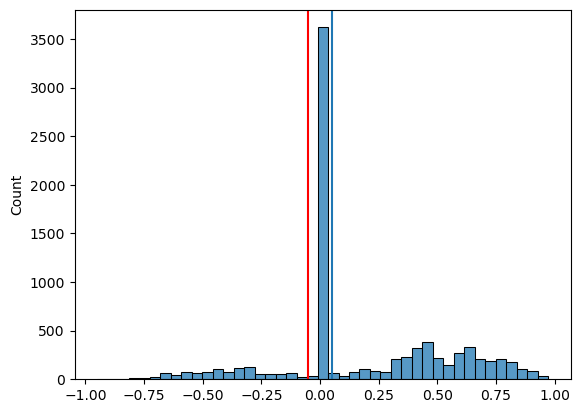

In [286]:
# This graph shows the overall number and range of sentiments in the tweets. The two lines are indiciative
# of the cutoff between negative, neutral, and positive. All tweets on the left of the red line mean that they are negative,
# and all on the right side are positive. And between the two lines are the neutral tweets.

ax = sns.histplot(old_tweet_sentiment)
ax.axvline(-.05, color='r')
ax.axvline(.05)
plt.show()

Here we were able to observe that most common sentiment value shown in the tweets is 0. 

In [287]:
# Give values to sentiment compound and use the values to give word values to vader emotion
clean_old_df2['sentiment_compound']=old_tweet_sentiment

clean_old_df2.loc[clean_old_df2['sentiment_compound']>=.05, 'vader_emotion']='Positive'
clean_old_df2.loc[clean_old_df2['sentiment_compound']<=-.05, 'vader_emotion']='Negative'
clean_old_df2.loc[(clean_old_df2['sentiment_compound']>-.05)&(clean_old_df2['sentiment_compound']<.05), 'vader_emotion']='Neutral'

In [288]:
# Here we can observe that the number of tweets with negative sentiments is a bit less than a third of tweets with
# positive or neutral tweets.
clean_old_df2['vader_emotion'].value_counts()

Neutral     3643
Positive    3564
Negative    1099
Name: vader_emotion, dtype: int64

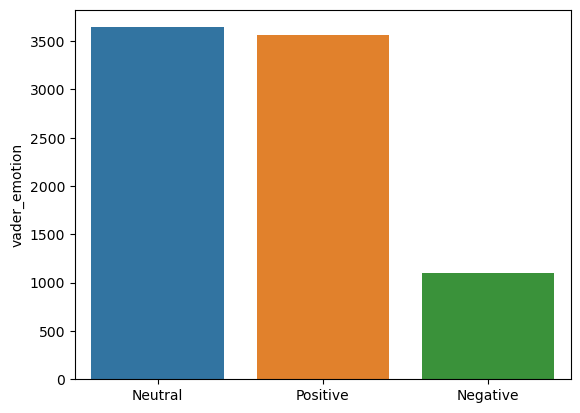

In [404]:
ax = sns.barplot(x=clean_old_df2['vader_emotion'].value_counts().index, y=clean_old_df2['vader_emotion'].value_counts())
plt.show()

In [289]:
clean_old_df2.head(15)
# show how many tweets did or didnt match

product or company                             emotion  \
0               Apple                    Negative emotion   
1               Apple                    Positive emotion   
2               Apple                    Positive emotion   
3               Apple                    Negative emotion   
4              Google                    Positive emotion   
5               Apple  No emotion toward brand or product   
7             Android                    Positive emotion   
8               Apple                    Positive emotion   
9               Apple                    Positive emotion   
10            Android                    Positive emotion   
11            Android                    Positive emotion   
12            Android                    Positive emotion   
13             Google                    Positive emotion   
14              Apple                    Positive emotion   
15              Apple                    Positive emotion   

                                                                                                              clean_text  \
0                        I have a G iPhone. After hrs tweeting at , it was dead! I need to upgrade. Plugin stations at .   
1    Know about ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at    
2                                                                 Can not wait for also. They should sale them down at .   
3                                                I hope this year's festival isn't as crashy as this year's iPhone app.    
4        great stuff on Fri : Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) & Matt Mullenweg (Wordpress)   
5                                                   New iPad Apps For And Communication Are Showcased At The Conference    
7            is just starting, is around the corner and is only a hop skip and a jump from there, good time to be an fan   
8                                                      Beautifully smart and simple idea wrote about our iPad app for !    
9                                     Counting down the days to plus strong Canadian dollar means stock up on Apple gear   
10                               Excited to meet the at so I can show them my Sprint Galaxy S still running Android . .    
11                                    Find & Start Impromptu Parties at With I can't wait til the Android app comes out.   
12                    Foursquare ups the game, just in time for - Still prefer by far, best looking Android app to date.   
13                               Gotta love this Google Calendar featuring top parties/ show cases to check out. via =>    
14                                                                                                Great ipad app from :    
15                                                                                      haha, awesomely rad iPad app by    

    sentiment_compound vader_emotion  
0              -0.6800      Negative  
1               0.9100      Positive  
2               0.0000       Neutral  
3               0.7269      Positive  
4               0.6249      Positive  
5               0.0000       Neutral  
7               0.6369      Positive  
8               0.7712      Positive  
9               0.5106      Positive  
10              0.3400      Positive  
11              0.4019      Positive  
12              0.6369      Positive  
13              0.7184      Positive  
14              0.6249      Positive  
15              0.4588      Positive

In [290]:
clean_old_df2[clean_old_df2['vader_emotion'].isna()]

Empty DataFrame
Columns: [product or company, emotion, clean_text, sentiment_compound, vader_emotion]
Index: []

In [291]:
emotion_dict={'Positive emotion':'Positive', 'Negative emotion':'Negative', 'No emotion toward brand or product':'Neutral'}
for key, values in emotion_dict.items():
    clean_old_df2.loc[clean_old_df2['emotion'].str.contains(key, case=False), 'emotion']= values

In [292]:
# Try to find how many of these match
clean_old_df2['emotion_match'] = np.where(clean_old_df2['emotion'] == clean_old_df2['vader_emotion'], 'True','False')

In [293]:
clean_old_df2

product or company   emotion  \
0                 Apple  Negative   
1                 Apple  Positive   
2                 Apple  Positive   
3                 Apple  Negative   
4                Google  Positive   
...                 ...       ...   
9088              Apple  Positive   
9089             Google   Neutral   
9090             Google   Neutral   
9091              Apple   Neutral   
9092             Google   Neutral   

                                                                                                                                  clean_text  \
0                                            I have a G iPhone. After hrs tweeting at , it was dead! I need to upgrade. Plugin stations at .   
1                        Know about ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at    
2                                                                                     Can not wait for also. They should sale them down at .   
3                                                                    I hope this year's festival isn't as crashy as this year's iPhone app.    
4                            great stuff on Fri : Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) & Matt Mullenweg (Wordpress)   
...                                                                                                                                      ...   
9088                                                                                                                       Ipad everywhere.    
9089                                                     Wave, buzz... We interrupt your regularly scheduled geek programming with big news    
9090               Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. "We're operating w/out data." dev   
9091  Some Verizon iPhone customers complained their time fell back an hour this weekend. Of course they were the New Yorkers who attended .   
9092                                                                                                  _ _ _ Google Tests Check-in Offers At    

      sentiment_compound vader_emotion emotion_match  
0                -0.6800      Negative          True  
1                 0.9100      Positive          True  
2                 0.0000       Neutral         False  
3                 0.7269      Positive         False  
4                 0.6249      Positive          True  
...                  ...           ...           ...  
9088              0.0000       Neutral         False  
9089             -0.4939      Negative         False  
9090              0.0000       Neutral          True  
9091             -0.4019      Negative         False  
9092              0.0000       Neutral          True  

[8306 rows x 6 columns]

In [294]:
print(clean_old_df2['emotion_match'].value_counts())
clean_old_df2['emotion_match'].groupby(clean_old_df2['vader_emotion']).value_counts()

True     4509
False    3797
Name: emotion_match, dtype: int64


vader_emotion  emotion_match
Negative       False             880
               True              219
Neutral        True             2503
               False            1140
Positive       True             1787
               False            1777
Name: emotion_match, dtype: int64

We are able to observe that around half of the previous sentiment analysis matches with the new vader sentiment analysis. We can see that the previous sentiment analysis did a poor job of identifying negative sentiments, was half and half for positive sentiments, and was able to correctly idenitfy a bit more than two-thirds of neutral sentiments

#### New Tweets

In [295]:
new_tweet_sentiment=[]
for text in clean_new2['clean_text']:
    ss=sid.polarity_scores(text)
    new_tweet_sentiment.append(ss['compound'])
new_tweet_sentiment

[-0.6597,
 0.0772,
 0.9115,
 0.7213,
 0.0,
 0.0,
 0.1633,
 0.0,
 0.0772,
 0.0,
 0.0772,
 -0.5423,
 0.0,
 -0.2732,
 0.0,
 0.0,
 0.743,
 0.0,
 0.0,
 -0.2225,
 -0.5949,
 0.3257,
 0.4215,
 0.0,
 0.3311,
 0.9325,
 0.0,
 0.7568,
 -0.0516,
 0.4939,
 0.34,
 0.5439,
 -0.3565,
 0.0644,
 0.3096,
 0.6249,
 -0.2225,
 0.0,
 0.0,
 0.8668,
 0.0,
 -0.7088,
 0.0,
 0.2714,
 -0.3818,
 0.7964,
 0.0,
 -0.4184,
 0.4939,
 0.9042,
 0.4588,
 0.0,
 -0.2225,
 0.2263,
 -0.2987,
 0.0,
 0.0,
 -0.0258,
 0.1486,
 -0.296,
 -0.2225,
 0.5994,
 -0.4404,
 0.6124,
 0.3612,
 0.8957,
 -0.6597,
 -0.7845,
 0.8881,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5423,
 -0.2225,
 -0.2225,
 0.0,
 0.0,
 0.4939,
 0.2732,
 0.0,
 0.8126,
 0.0,
 0.4019,
 0.7004,
 0.0,
 -0.296,
 -0.5423,
 -0.126,
 0.0,
 0.0,
 -0.775,
 0.0,
 -0.4588,
 -0.2225,
 0.0,
 0.5423,
 0.0,
 0.0,
 0.0,
 -0.2225,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2225,
 0.7639,
 -0.3182,
 0.0,
 -0.2225,
 0.0,
 0.0258,
 0.8519,
 -0.2225,
 0.0,
 0.0,
 0.7783,
 0.0,
 0.2481,
 0.8402,
 0.0,
 0.2023,
 -0.2225,
 

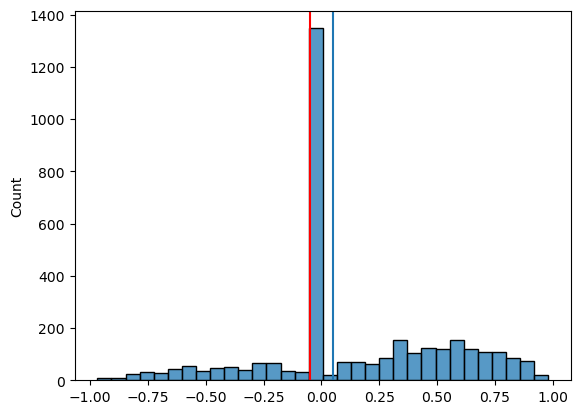

In [296]:
ax = sns.histplot(new_tweet_sentiment)
ax.axvline(-.05, color='r')
ax.axvline(.05)
plt.show()

This graph also shows great similarity to the previous one where 0 is the most common sentiment value

In [297]:
# Give values to sentiment compound and use the values to give word values to vader emotion
clean_new2['sentiment_compound']=new_tweet_sentiment

clean_new2.loc[clean_new2['sentiment_compound']>=.05, 'vader_emotion']='Positive'
clean_new2.loc[clean_new2['sentiment_compound']<=-.05, 'vader_emotion']='Negative'
clean_new2.loc[(clean_new2['sentiment_compound']>=-.05)&(clean_new2['sentiment_compound']<=.05), 'vader_emotion']='Neutral'

In [298]:
clean_new2.head()

created_at                   id            id_string  \
0  Fri Jul 09 15:55:27 +0000 2021  1413527226071588868  1413527226071588868   
1  Fri Jul 09 15:55:26 +0000 2021  1413527223252832257  1413527223252832257   
5  Fri Jul 09 15:55:26 +0000 2021  1413527220727861251  1413527220727861251   
6  Fri Jul 09 15:55:24 +0000 2021  1413527212641423362  1413527212641423362   
7  Fri Jul 09 15:55:23 +0000 2021  1413527209181126660  1413527209181126660   

  product or company  \
0              Apple   
1              Apple   
5              Apple   
6              Apple   
7              Apple   

                                                                                                                                                                                                           clean_text  \
0        the fact that apple doesn t sync the contacts you blocked on your phone to your mac is sick. this man messaged me and it came thru to my laptop and for the paat two days i ve been debating cursing him out   
1                                                                                                                                                   j-armys doing the most for apple music yall pls stream there too    
5  Please, if you can, if it's okay on your schedule, do join on the listening parties! You just have to go to the site and log in with you Spotify/Apple Music account and you can join the listening party already!   
6                                                                                        Due to I ll be blessing the first people that RETWEET & LIKE this tweet with $ - $ . Must have CashApp , Apple Pay or Zelle    
7                                                                                                                                 Opened Debris - Backlane request via iphone at A St SE Garbage piled in back lane.    

   sentiment_compound vader_emotion  
0             -0.6597      Negative  
1              0.0772      Positive  
5              0.9115      Positive  
6              0.7213      Positive  
7              0.0000       Neutral

In [299]:
clean_new2['vader_emotion'].value_counts()

Positive    1471
Neutral     1353
Negative     581
Name: vader_emotion, dtype: int64

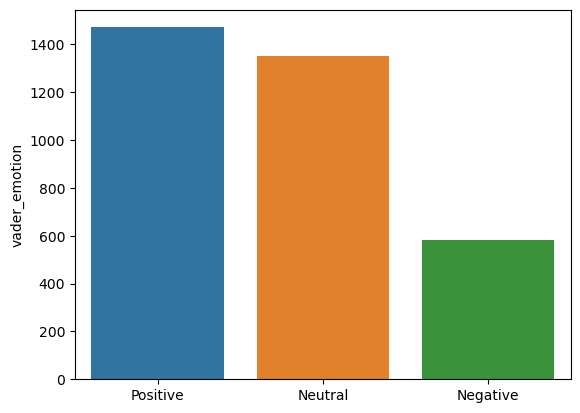

In [405]:
ax = sns.barplot(x=clean_new2['vader_emotion'].value_counts().index, y=clean_new2['vader_emotion'].value_counts())
plt.show()

The same can also be said of the individual emotions' value counts. Tweets with negative emotion are around a third of both positve and neutral tweets

## Tokenizing
Tokenizing is a process of splitting the tweet text into individual words and/or punctuation marks. This is considered one of the most important and foundational steps to performing NLP. 

#### Old Tweets

In [300]:
# Create a list of all the common words in the old tweet
corpus_old = clean_old_df2['clean_text'].to_list()
token_list_old= word_tokenize(', '.join(corpus_old))

In [301]:
freq_dist=FreqDist(token_list_old)
freq_dist.most_common(10)

[(',', 11638),
 ('.', 5044),
 ('the', 3628),
 ('to', 3218),
 ('at', 2632),
 ('for', 2238),
 ('!', 2161),
 ('iPad', 2058),
 ('a', 2035),
 ('Google', 1984)]

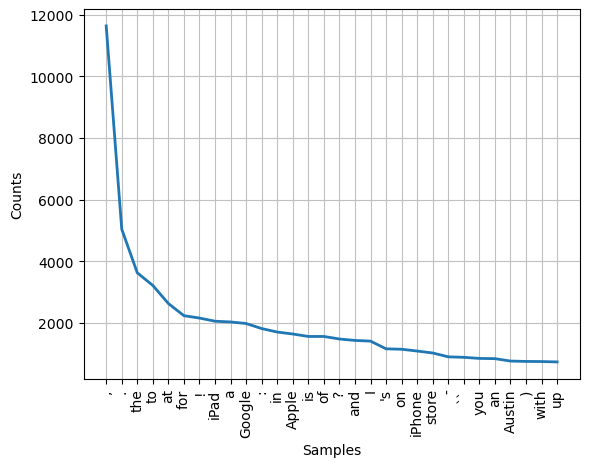

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [302]:
freq_dist.plot(30)

In [303]:
# Create a horizontal distribution of the most common words in the list
def common_word_hdist(word_list, n=30, figsize=(12,5)):
    freq_df = pd.DataFrame(word_list.most_common(100), columns=['Common Words','count']).sort_values('count', ascending=True)
    freq_df.set_index('Common Words').tail(n).plot(kind='barh', figsize=(12,5))
    plt.show()

In [304]:
# Create a list of all the common words in the newer tweets
corpus_new = clean_new2['clean_text'].to_list()
token_list_new= word_tokenize(', '.join(corpus_new))

freq_dist_new=FreqDist(token_list_new)

In [305]:
freq_df_new = pd.DataFrame(freq_dist_new.most_common(100), columns=['Common Words','count']).sort_values('count', ascending=True)

I wanted to see which words were the most common in the tweets as well as which words should be included in the stopwords list. So after creating frequency distribution of the combination of both old and new tweets' clean text, I created a distribution plot of the most common words/characters

In [306]:
corpus_total = pd.concat([clean_old_df2['clean_text'],clean_new2['clean_text']]).to_list()
total_tokenlist = word_tokenize(', '.join(corpus_total))
freq_total = FreqDist(total_tokenlist)


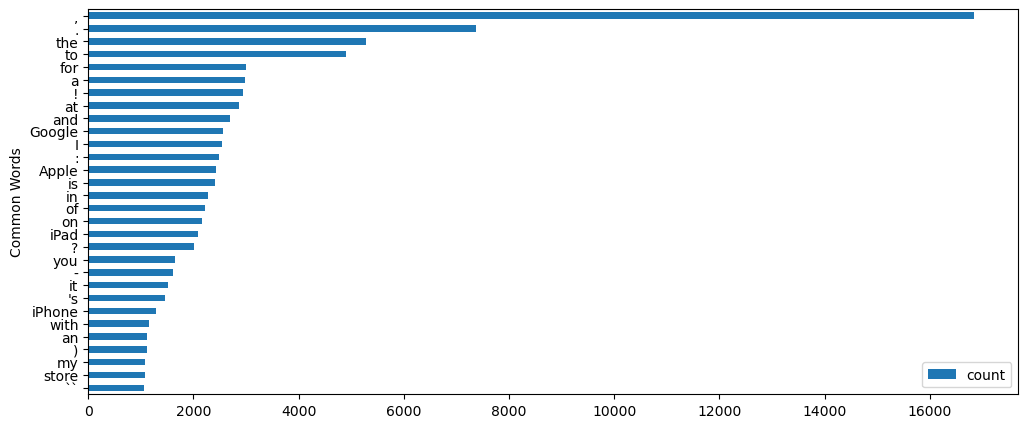

In [307]:
# frequency distribution of the most common words/characters in both tweets
common_word_hdist(freq_total)

In both the old and new tweets, punctuation marks were always on the top 30 most common characters. Other common words included the companies' names and products. I determined that these words/characters should be included in the stopwords list

#### Stop Words

In [308]:
#Stop words
stop_words=stopwords.words('english')
stop_words.sort()
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [309]:
# First I am including punctuation marks, common twitter phrases such as rt and mention;
# Quotation marks were also included since they were not part of the string.punctuation
# Finally, posessives such as 's and the company names and products were included in the stop words
stop_words.extend(string.punctuation)
stop_words.extend(['RT', 'mention','SXSW','link'])
stop_words.extend(['“','”','...',"''",'’','``'])
stop_words.extend(["'s","n't"])
stop_words.extend(['apple','google','android','apple','ipad','i-pad','iphone'])

In [310]:
# only have 1 dist plt and then use the stopwords to show which words were actually used the most
# Then display the dist plot for the new and old tweets

In [311]:
#Create new word cloud stop word list
wordcloud_stopwords=stop_words.copy()

In [312]:
# Removing stopwords from token lists
stopwords_removed_old = [x.lower() for x in token_list_old if x.lower() not in stop_words]
stopwords_removed_new = [x.lower() for x in token_list_new if x.lower() not in stop_words]
stopwords_removed_total = [x.lower() for x in total_tokenlist if x.lower() not in stop_words]

In [313]:
sw_freq_old = FreqDist(stopwords_removed_old)
sw_freq_new = FreqDist(stopwords_removed_new)
sw_freq_total = FreqDist(stopwords_removed_total)

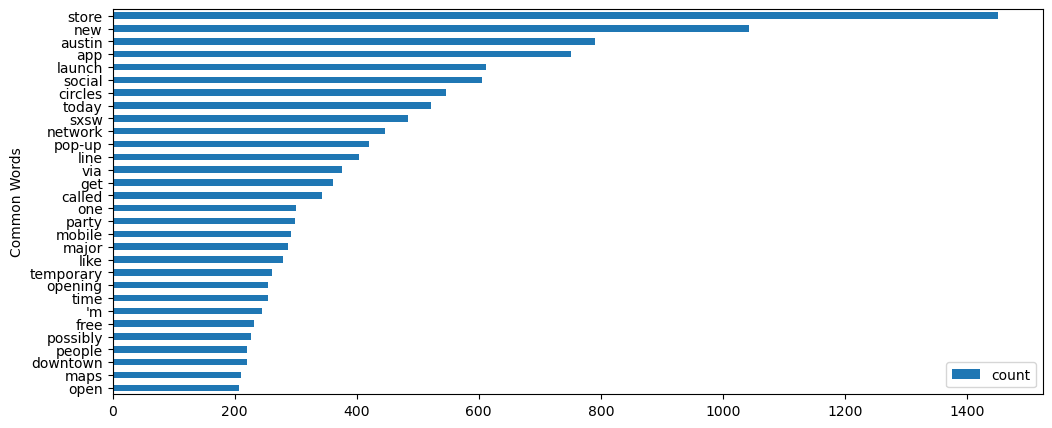

In [314]:
common_word_hdist(sw_freq_old)

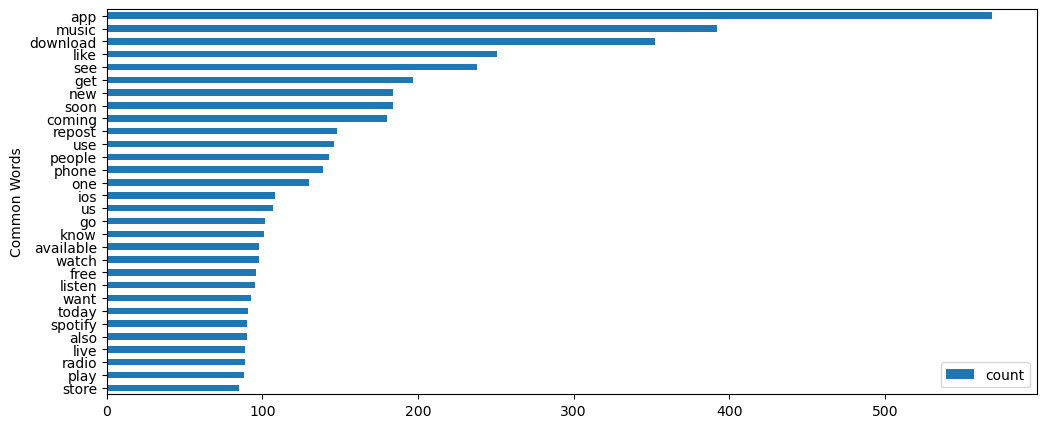

In [315]:
common_word_hdist(sw_freq_new)

In [387]:
common_word_hdist(stopwords_removed_total)

AttributeError: 'list' object has no attribute 'most_common'

In [317]:
t_tokenizer=TweetTokenizer(strip_handles=True, reduce_len=True)
t_token=[]
# for token in token_list:
for text in clean_old_df2['clean_text']:
    t_token.extend(t_tokenizer.tokenize(text))
# t_token

### Lemmatization
#### Old Tweets

In [318]:
lemmatizer = WordNetLemmatizer()
lemmatized_old_tweet = [lemmatizer.lemmatize(x) for x in token_list_old]
lemmatized_old_tweet[:5]

['I', 'have', 'a', 'G', 'iPhone']

#### New Tweets

In [319]:
lemmatized_new_tweet = [lemmatizer.lemmatize(x) for x in token_list_new]
lemmatized_new_tweet[:5]

['the', 'fact', 'that', 'apple', 'doesn']

In [320]:
# Vectorizer for modeling. it will do tokenizing for you. scikitlearn.vectorizer
# for twitter say tokenizer=tweettokenizer

# Using the compound(from vader), give sentiment first then create word clouds for positive, negative and neutral


## Old Tweet Modeling
### Preprocessing

In [321]:
old_X = clean_old_df2['clean_text'].copy()
old_y = clean_old_df2['vader_emotion'].copy()

In [322]:
old_X_train , old_X_test , old_y_train , old_y_test = train_test_split(old_X, old_y, test_size= .3, random_state= 334)

In [323]:
old_X_train

749                                                                 Google no lanzara ningun producto en South by SouthWest 
6767                                    The session is changing my mind about my future kid's relationship with the iPhone. 
7022                                                                                    Am I the only one left with an iPad 
3927                                                  Playing with my fave new iPhone app, Wow, this will rock at next week!
921                                         HootSuite News: HootSuite Mobile for ~ Updates for iPhone, BlackBerry & Android 
                                                                ...                                                         
2938              Lol at : "apple comes up with cool technology no one's ever heard of because they don't go to conferences"
8508                                                    P.S. and Google throw a b!tchin' party. Shout out to The Spazmatics 


In [324]:
old_y_train.isna().sum()

0

### Vectorization


In [325]:
vectorizer =TfidfVectorizer(tokenizer=t_tokenizer.tokenize,stop_words=stop_words)
old_X_train_tfidf = vectorizer.fit_transform(old_X_train)
old_X_test_tfidf = vectorizer.transform(old_X_test)
old_X_train_tfidf

F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['rt', 'sxsw'] not in stop_words.



<5814x6934 sparse matrix of type '<class 'numpy.float64'>'
	with 44646 stored elements in Compressed Sparse Row format>

In [326]:
len(vectorizer.vocabulary_)

6934

In [327]:
print(old_y_train.unique())

['Negative' 'Neutral' 'Positive']



### Random Forest

In [328]:
# Random Forest Modeling
rand_f=RandomForestClassifier(class_weight='balanced')
rand_f.fit(old_X_train_tfidf, old_y_train)

RandomForestClassifier(class_weight='balanced')

In [329]:
# give model score.
# model = sckitlearn model type

def model_score(model, X_test_tfidf, y_test, cmap='Blues', normalize='true', class_names=None, figsize=(12,6),
               X_train=None, y_train=None):
    # predictions and classification report
    print(metrics.classification_report(y_test, model.predict(X_test_tfidf), target_names=class_names))
    
    # Confusion Matrix
#     fig, ax= plt.subplots(ncols=len(class_names), figsize=figsize)
    metrics.plot_confusion_matrix(model, X_test_tfidf, y_test, cmap=cmap, normalize=normalize,
                                 display_labels=class_names)#, ax=ax[0])

    if (X_train is not None) & (y_train is not None):
        print(f"Training Score = {model.score(X_train,y_train):.2f}")
        print(f"Test Score = {model.score(X_test_tfidf,y_test):.2f}")
    plt.show()

              precision    recall  f1-score   support

    Negative       0.93      0.44      0.60       338
     Neutral       0.75      0.97      0.84      1091
    Positive       0.92      0.79      0.85      1063

    accuracy                           0.82      2492
   macro avg       0.87      0.73      0.76      2492
weighted avg       0.84      0.82      0.81      2492

Training Score = 1.00
Test Score = 0.82


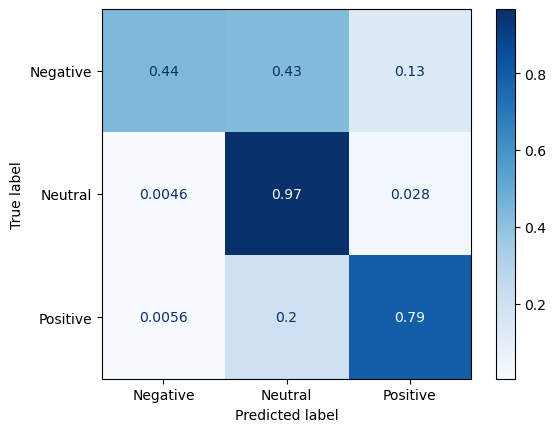

In [330]:
model_score(rand_f, old_X_test_tfidf, old_y_test, class_names=None,#old_y_train.unique(), 
            X_train=old_X_train_tfidf, y_train=old_y_train)

Tweets with neutral sentiments were most well identified. I believe that this is the case because of the small range given to neutral sentiments in vader sentiment analysis.

#### Random Forest GridSearch and NLP Pipeline

In [332]:
tweet_pipeline = Pipeline(steps=[('count_vectorizer',CountVectorizer()),
                            ('tf_transformer',TfidfTransformer(use_idf=True))])
tweet_pipeline

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tf_transformer', TfidfTransformer())])

In [333]:
old_X_train_pipe= tweet_pipeline.fit_transform(old_X_train)
old_X_test_pipe= tweet_pipeline.transform(old_X_test)
old_X_train_pipe

<5814x6772 sparse matrix of type '<class 'numpy.float64'>'
	with 76494 stored elements in Compressed Sparse Row format>

In [334]:
model_pipeline=Pipeline([('tweet_pipe', tweet_pipeline), 
                         ('clf', RandomForestClassifier(class_weight='balanced'))])
model_pipeline

Pipeline(steps=[('tweet_pipe',
                 Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                                 ('tf_transformer', TfidfTransformer())])),
                ('clf', RandomForestClassifier(class_weight='balanced'))])

              precision    recall  f1-score   support

    Negative       0.91      0.42      0.58       338
     Neutral       0.73      0.91      0.81      1091
    Positive       0.82      0.76      0.79      1063

    accuracy                           0.78      2492
   macro avg       0.82      0.70      0.72      2492
weighted avg       0.79      0.78      0.77      2492

Training Score = 1.00
Test Score = 0.78


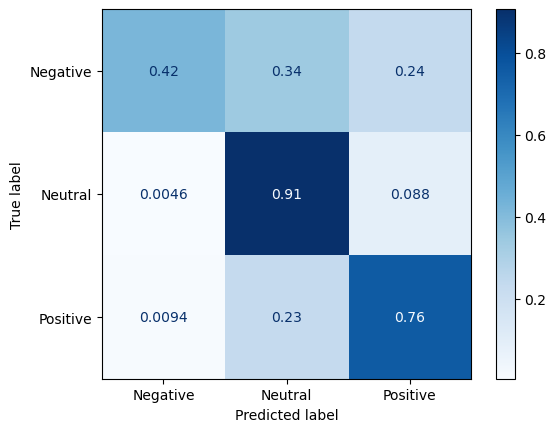

In [335]:
model_pipeline.fit(old_X_train, old_y_train)
model_score(model_pipeline, old_X_test, old_y_test, X_train=old_X_train, y_train= old_y_train)

After performing the pipeline, we see that the performance has decreased for the model. 

In [337]:
params = {'tweet_pipe__tf_transformer__use_idf':[True,False],
          'tweet_pipe__tf_transformer__norm':['l2','l1'],
          'tweet_pipe__tf_transformer__smooth_idf':[True,False],
          'tweet_pipe__count_vectorizer__stop_words':[stop_words,None],
          'clf__criterion':['gini','entropy'],
          'clf__max_depth':[None, 10, 30, 50, 75]
         }

In [338]:
gs= GridSearchCV(model_pipeline, params, cv=3, scoring='recall_macro', n_jobs=-1, verbose = 2)
gs.fit(old_X_train, old_y_train)
gs.best_params_

Fitting 3 folds for each of 160 candidates, totalling 480 fits


F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['pad', 'rt', 'sxsw'] not in stop_words.



{'clf__criterion': 'gini',
 'clf__max_depth': 75,
 'tweet_pipe__count_vectorizer__stop_words': ['a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  'if',
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it's",
  'its',
  'itself',
  'just',
  'll',
  'm',
  'ma',
  'me',
  'mightn',
  "mightn't",
  'more',
  'most',
  'mustn',
  "mustn't",
  'my',
  

              precision    recall  f1-score   support

    Negative       0.68      0.51      0.58       338
     Neutral       0.74      0.92      0.82      1091
    Positive       0.89      0.74      0.81      1063

    accuracy                           0.79      2492
   macro avg       0.77      0.72      0.74      2492
weighted avg       0.80      0.79      0.78      2492

Training Score = 0.95
Test Score = 0.79


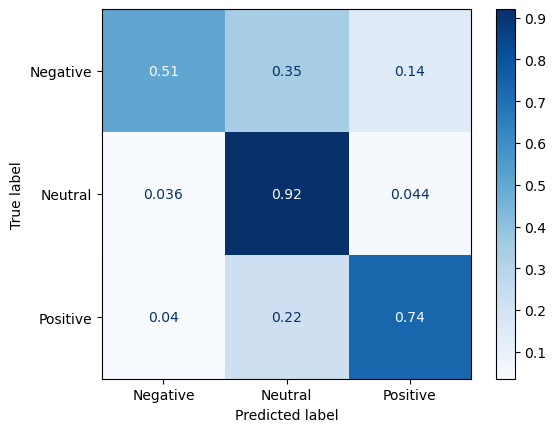

In [339]:
model_score(gs.best_estimator_, old_X_test, old_y_test, X_train= old_X_train, y_train= old_y_train)

The gridsearch helped improve identifying tweets with negative sentiments, but the recall score for the neutral and positive tweets have decreased by nearly identical amount.
However, I believe that this is the best model for the old tweets' sentiment analysis as the recall score for both the neutral and positive sentiments were acceptable, and the recall score for negative sentiments were above .5

### Naive Bayesian Classification

In [340]:
# n_bayes = GaussianNB()
n_bayes = MultinomialNB()
n_bayes.fit(old_X_train_pipe, old_y_train)

MultinomialNB()

              precision    recall  f1-score   support

    Negative       1.00      0.06      0.11       338
     Neutral       0.74      0.80      0.77      1091
    Positive       0.69      0.84      0.76      1063

    accuracy                           0.72      2492
   macro avg       0.81      0.57      0.55      2492
weighted avg       0.75      0.72      0.67      2492

Training Score = 0.81
Test Score = 0.72


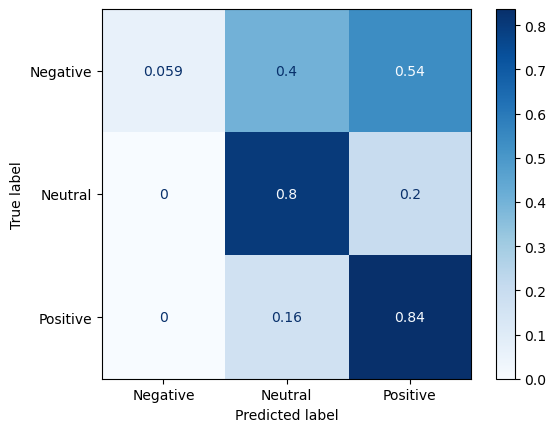

In [341]:
model_score(n_bayes, old_X_test_pipe, old_y_test, X_train= old_X_train_pipe, y_train= old_y_train)

Compared to the random forest model, the naive bayesian model performed significantly worse, especially for tweets with negative sentiments.
Even with the smaller size of the negative tweets, the low recall rate of .059 seems to be extraneous.

In [342]:
bayes_pipeline= Pipeline(steps=[('tweet_pipe', tweet_pipeline), ('clf', MultinomialNB())])

params = {'tweet_pipe__tf_transformer__use_idf':[True, False],
          'tweet_pipe__tf_transformer__norm':['l2','l1'],
          'tweet_pipe__tf_transformer__use_idf':[True,False],
          'tweet_pipe__tf_transformer__smooth_idf':[True,False],
#           'tweet_pipe__count_vectorizer__tokenizer':[ 
# #               None,                                       
#               TweetTokenizer(preserve_case=True).tokenize,
#               TweetTokenizer(preserve_case=False).tokenize],
          
          'tweet_pipe__count_vectorizer__stop_words':[None,stop_words],
#           'tweet_pipe__count_vectorizer__max_df':[1.0,0.95,0.9],
#           'ttweet_pipe__count_vectorizer__min_df':[1,2,3],
          
         'clf__alpha':[0, 1],
         'clf__fit_prior':[True,False]}
gs = GridSearchCV(bayes_pipeline, params, cv=3, scoring = 'recall_macro', n_jobs=-1, verbose =2)
gs.fit(old_X_train, old_y_train)
gs.best_params_

Fitting 3 folds for each of 64 candidates, totalling 192 fits


F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['pad', 'rt', 'sxsw'] not in stop_words.

F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



{'clf__alpha': 0,
 'clf__fit_prior': False,
 'tweet_pipe__count_vectorizer__stop_words': ['a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  'if',
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it's",
  'its',
  'itself',
  'just',
  'll',
  'm',
  'ma',
  'me',
  'mightn',
  "mightn't",
  'more',
  'most',
  'mustn',
  "mustn't",
  'my',
  'mysel

              precision    recall  f1-score   support

    Negative       0.51      0.53      0.52       338
     Neutral       0.84      0.72      0.77      1091
    Positive       0.74      0.84      0.79      1063

    accuracy                           0.75      2492
   macro avg       0.70      0.70      0.70      2492
weighted avg       0.75      0.75      0.75      2492

Training Score = 0.95
Test Score = 0.75


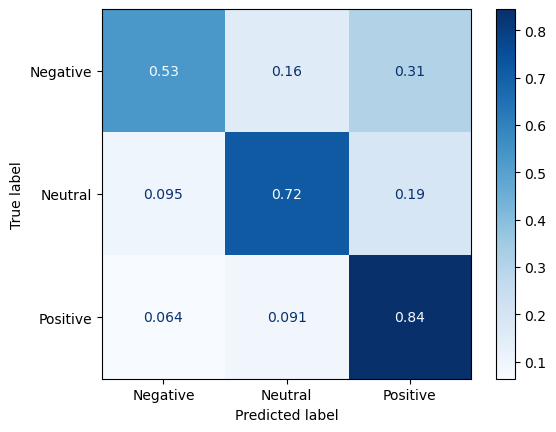

In [343]:
model_score(gs.best_estimator_, old_X_test, old_y_test, X_train= old_X_train, y_train = old_y_train)

After performing the grid search for the naive bayesian model, the results improved dramatically. The recall score for the negative tweets were slightly better than the random forest models, but the overall recall scores were lower than the rf models

## New Tweet Modeling


### Preprocessing

In [344]:
# move for each new tweet old tweet. move x and y above the models

In [345]:
new_X = clean_new2['clean_text'].copy()
new_y = clean_new2['vader_emotion'].copy()

In [346]:
new_X_train , new_X_test , new_y_train , new_y_test = train_test_split(new_X, new_y, test_size=.3, random_state=334)
new_X_train

4421                                                                                      Homescreen for Today Kggm Material for Kwgt by Wallpaper by Hishoot Template by 
1542             I just google things. You can always rely on google to tell you anything. And YouTube! So many times that had saved me by giving me a visual walkthrough!
3041                                                                                                           YouTube TV Picks Up Three New Add-On Channels For $ . Each 
4127                                                                                                                                                      Make your case! 
659                                                                      Damn. Apple is gonna bring the hammer down. Shifts will go from to hours at their overseas plant.
                                                                                       ...                                                       

### Vectorization

In [347]:
new_vectorizer = TfidfVectorizer(tokenizer=t_tokenizer.tokenize,stop_words=stop_words)
new_X_train_tfidf = new_vectorizer.fit_transform(new_X_train) 
new_X_test_tfidf = new_vectorizer.transform(new_X_test)
new_X_train_tfidf

F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['rt', 'sxsw'] not in stop_words.



<2383x6758 sparse matrix of type '<class 'numpy.float64'>'
	with 23360 stored elements in Compressed Sparse Row format>

In [348]:
new_y_train.unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

### Random Forest

In [349]:
rand_f2=RandomForestClassifier(class_weight='balanced')
rand_f2.fit(new_X_train_tfidf, new_y_train)

RandomForestClassifier(class_weight='balanced')

              precision    recall  f1-score   support

    Negative       0.89      0.31      0.46       175
     Neutral       0.66      0.96      0.78       406
    Positive       0.85      0.71      0.78       441

    accuracy                           0.74      1022
   macro avg       0.80      0.66      0.67      1022
weighted avg       0.78      0.74      0.72      1022

Training Score = 1.00
Test Score = 0.74


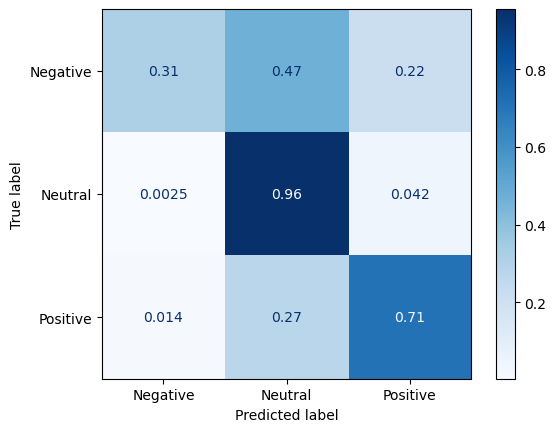

In [388]:
model_score(rand_f2, new_X_test_tfidf, new_y_test, class_names=None,
            X_train = new_X_train_tfidf, y_train = new_y_train)

The number of tweets with negative sentiments were also mirrored with the older tweets (a third of positive or neutral), and the results are also similar with the highest recal score for neutral tweets.

#### Pipeline

              precision    recall  f1-score   support

    Negative       0.93      0.22      0.35       175
     Neutral       0.70      0.84      0.76       406
    Positive       0.70      0.79      0.74       441

    accuracy                           0.71      1022
   macro avg       0.78      0.61      0.62      1022
weighted avg       0.74      0.71      0.68      1022

Training Score = 1.00
Test Score = 0.71


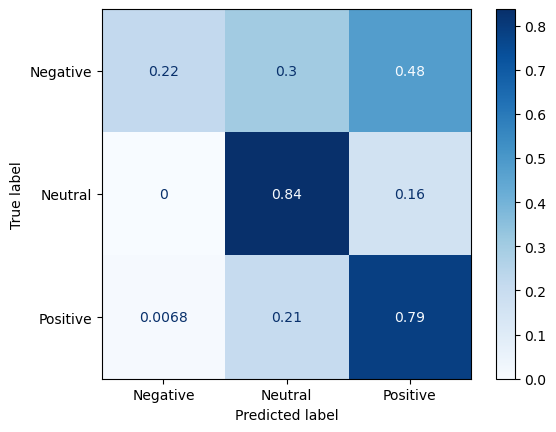

In [352]:
tweet_pipeline_new = Pipeline(steps=[('count_vectorizer',CountVectorizer()),
                            ('tf_transformer',TfidfTransformer(use_idf=True))])


new_X_train_pipe= tweet_pipeline.fit_transform(new_X_train)
new_X_test_pipe= tweet_pipeline.transform(new_X_test)


model_pipeline_new=Pipeline([('tweet_pipe', tweet_pipeline), 
                         ('clf', RandomForestClassifier(class_weight='balanced'))])


model_pipeline_new.fit(new_X_train, new_y_train)
model_score(model_pipeline_new, new_X_test, new_y_test, X_train=new_X_train, y_train= new_y_train)

Compared to the old tweets' random forest model with pipeline, there is a slight increase in the recall score for tweets with positive sentiment. However, like in the old tweets' model, the overall performance has decreased compared to the rf model without pipelining.

#### GridSearch CV

In [391]:
params = {'tweet_pipe__tf_transformer__use_idf':[True,False],
          'tweet_pipe__tf_transformer__norm':['l2','l1'],
          'tweet_pipe__tf_transformer__smooth_idf':[True,False],
          'tweet_pipe__count_vectorizer__stop_words':[stop_words,None],
          'tweet_pipe__count_vectorizer__max_df':[1.0,0.95],
          'tweet_pipe__count_vectorizer__min_df':[1,2,3],
          'clf__criterion':['gini','entropy'],
          'clf__max_depth':[None, 10, 30, 50, 75]
         }

gs_new= GridSearchCV(model_pipeline_new, params, cv=3, scoring='recall_macro', n_jobs=-1, verbose = 2)
# SCORING RECALL MACRO IF I GET ALL THE NANS
gs_new.fit(new_X_train, new_y_train)
gs_new.best_params_

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['pad', 'rt', 'sxsw'] not in stop_words.



{'clf__criterion': 'entropy',
 'clf__max_depth': None,
 'tweet_pipe__count_vectorizer__max_df': 0.95,
 'tweet_pipe__count_vectorizer__min_df': 3,
 'tweet_pipe__count_vectorizer__stop_words': ['a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  'if',
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it's",
  'its',
  'itself',
  'just',
  'll',
  'm',


              precision    recall  f1-score   support

    Negative       0.69      0.37      0.48       175
     Neutral       0.68      0.87      0.76       406
    Positive       0.82      0.75      0.78       441

    accuracy                           0.73      1022
   macro avg       0.73      0.66      0.68      1022
weighted avg       0.74      0.73      0.72      1022

Training Score = 0.99
Test Score = 0.73


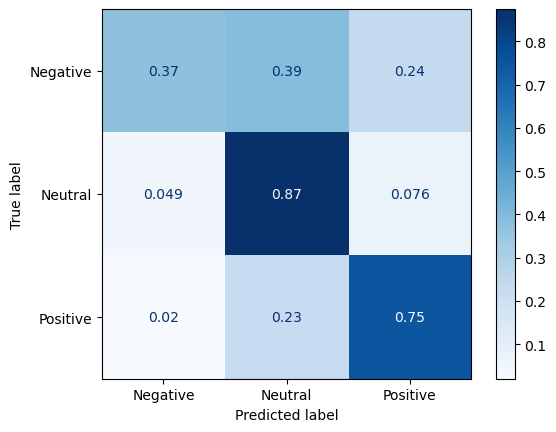

In [392]:
model_score(gs_new.best_estimator_, new_X_test, new_y_test, X_train= new_X_train, y_train = new_y_train)

The recall scores for negative tweets has slightly improved compared to the original rf model of the new tweets, but the recall scores of the other tweets have decreased by a similar amount to that increase.
However, like the rf models of the old tweets, I believe that the rf models after the gridsearch are the best because it maintains a relatively high recall score for the positive and neutral tweets while improving the recall score for the negative tweets.

### Naive Bayesian

In [355]:
n_bayes_new = MultinomialNB()
n_bayes_new.fit(new_X_train_pipe, new_y_train)

MultinomialNB()

              precision    recall  f1-score   support

    Negative       1.00      0.13      0.22       175
     Neutral       0.78      0.52      0.62       406
    Positive       0.56      0.93      0.70       441

    accuracy                           0.63      1022
   macro avg       0.78      0.52      0.51      1022
weighted avg       0.72      0.63      0.59      1022

Training Score = 0.77
Test Score = 0.63


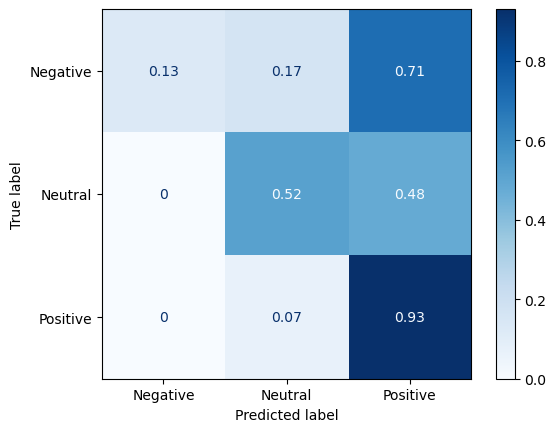

In [356]:
model_score(n_bayes_new, new_X_test_pipe, new_y_test, X_train= new_X_train_pipe, y_train= new_y_train )

The recall score for the negative and neutral tweets are far lower than those from the random forest model. Overall, the naive bayesian models did not perform well before performing the gridsearch.

#### Naive Bayesian GridSearch

In [357]:
bayes_pipeline_new= Pipeline(steps=[('tweet_pipe', tweet_pipeline), ('clf', MultinomialNB())])

params = {'tweet_pipe__tf_transformer__use_idf':[True, False],
          'tweet_pipe__tf_transformer__norm':['l2','l1'],
          'tweet_pipe__tf_transformer__use_idf':[True,False],
          'tweet_pipe__tf_transformer__smooth_idf':[True,False],
          'tweet_pipe__count_vectorizer__stop_words':[None,stop_words],    
         'clf__alpha':[0, 1],
         'clf__fit_prior':[True,False]}
gs_new = GridSearchCV(bayes_pipeline_new, params, cv=3, scoring = 'recall_macro', n_jobs=-1, verbose =2)
gs_new.fit(new_X_train, new_y_train)
gs_new.best_params_

Fitting 3 folds for each of 64 candidates, totalling 192 fits


F:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



{'clf__alpha': 0,
 'clf__fit_prior': False,
 'tweet_pipe__count_vectorizer__stop_words': None,
 'tweet_pipe__tf_transformer__norm': 'l2',
 'tweet_pipe__tf_transformer__smooth_idf': True,
 'tweet_pipe__tf_transformer__use_idf': False}

              precision    recall  f1-score   support

    Negative       0.48      0.46      0.47       175
     Neutral       0.79      0.54      0.64       406
    Positive       0.63      0.83      0.72       441

    accuracy                           0.65      1022
   macro avg       0.63      0.61      0.61      1022
weighted avg       0.67      0.65      0.64      1022

Training Score = 0.98
Test Score = 0.65


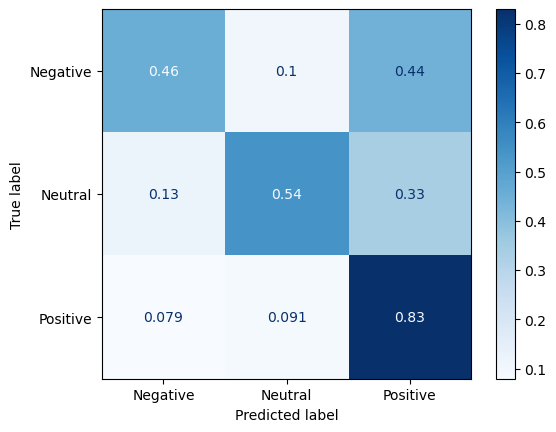

In [358]:
model_score(gs_new.best_estimator_, new_X_test, new_y_test, X_train= new_X_train, y_train = new_y_train)

While the recall scores have improved prior to the gridsearch, the recalls core for the neutral tweets are still far too low considering the number of neutral tweets.

## Word Cloud
Move this section to above the modeling section

In [359]:
# Wordcloud Generator
def wordcloud_generator(text, cmap, stopwords=None, min_font=12, n_grams=True, title='Word Cloud'):
    cloud = WordCloud(colormap=cmap, stopwords=stop_words, width=650, height=400, min_font_size=min_font,\
                      collocations=n_grams).generate(' '.join(text))#generate_from_text(' '.join(text))#
    fig, ax = plt.subplots(figsize=(12,7))
    ax.imshow(cloud)
    ax.set_axis_off()
    ax.set_title=(title)
    ax.margins(x=0, y=0)
    ax.axis('off')
    plt.show()

In [360]:
# generate word clouds for each negative positive neutral. compare what words have chagned

In [361]:
old_positive = clean_old_df2.loc[clean_old_df2['vader_emotion']=='Positive'].copy()
old_negative = clean_old_df2.loc[clean_old_df2['vader_emotion']=='Negative'].copy()
old_neutral = clean_old_df2.loc[clean_old_df2['vader_emotion']=='Neutral'].copy()

In [362]:
old_positive

product or company   emotion  \
1                 Apple  Positive   
3                 Apple  Negative   
4                Google  Positive   
7               Android  Positive   
8                 Apple  Positive   
...                 ...       ...   
9073              Apple   Neutral   
9077              Apple  Positive   
9079              Apple  Positive   
9080             Google  Negative   
9086             Google   Neutral   

                                                                                                                      clean_text  \
1            Know about ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at    
3                                                        I hope this year's festival isn't as crashy as this year's iPhone app.    
4                great stuff on Fri : Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) & Matt Mullenweg (Wordpress)   
7                    is just starting, is around the corner and is only a hop skip and a jump from there, good time to be an fan   
8                                                              Beautifully smart and simple idea wrote about our iPad app for !    
...                                                                                                                          ...   
9073                                                                                 At your iphone charger is your best friend.   
9077                                                    your PR guy just convinced me to switch back to iPhone. Great coverage.    
9079                                                                      "papyrus...sort of like the ipad" - nice! Lol! Lavelle   
9080              Diller says Google TV "might be run over by the PlayStation and the Xbox, which are essentially ready today."    
9086  Google says: want to give a lightning talk to a ckers audience at tonight? Email ben.mcgraw gmail.com for a spot on stage.   

      sentiment_compound vader_emotion emotion_match  
1                 0.9100      Positive          True  
3                 0.7269      Positive         False  
4                 0.6249      Positive          True  
7                 0.6369      Positive          True  
8                 0.7712      Positive          True  
...                  ...           ...           ...  
9073              0.8126      Positive         False  
9077              0.7783      Positive          True  
9079              0.8264      Positive          True  
9080              0.3612      Positive         False  
9086              0.0772      Positive         False  

[3564 rows x 6 columns]

In [363]:
new_positive = clean_new2.loc[clean_new2['vader_emotion']=='Positive'].copy()
new_negative = clean_new2.loc[clean_new2['vader_emotion']=='Negative'].copy()
new_neutral = clean_new2.loc[clean_new2['vader_emotion']=='Neutral'].copy()

### No Stop Words Old Twitter

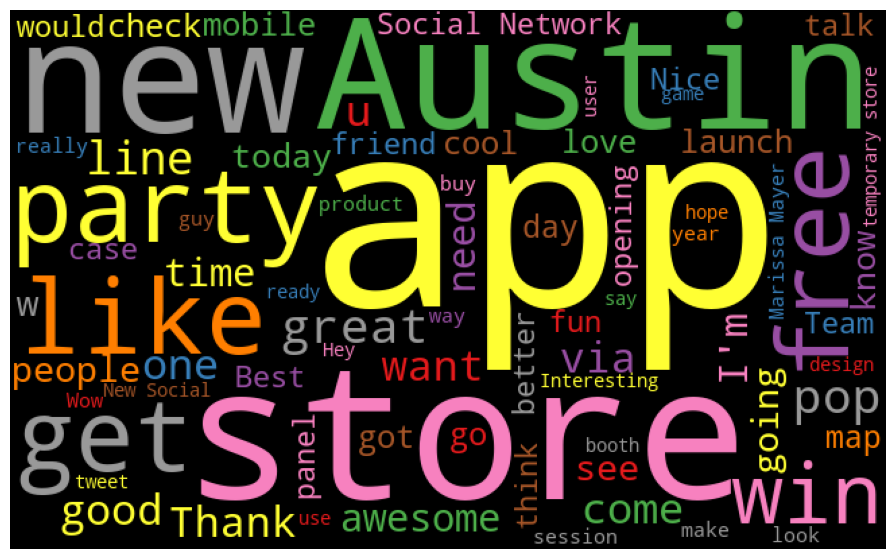

In [364]:
old_pos_wc=wordcloud_generator(text=old_positive['clean_text'], cmap='Set1', stopwords=None, min_font=12)#, title='Full Token List')
old_pos_wc

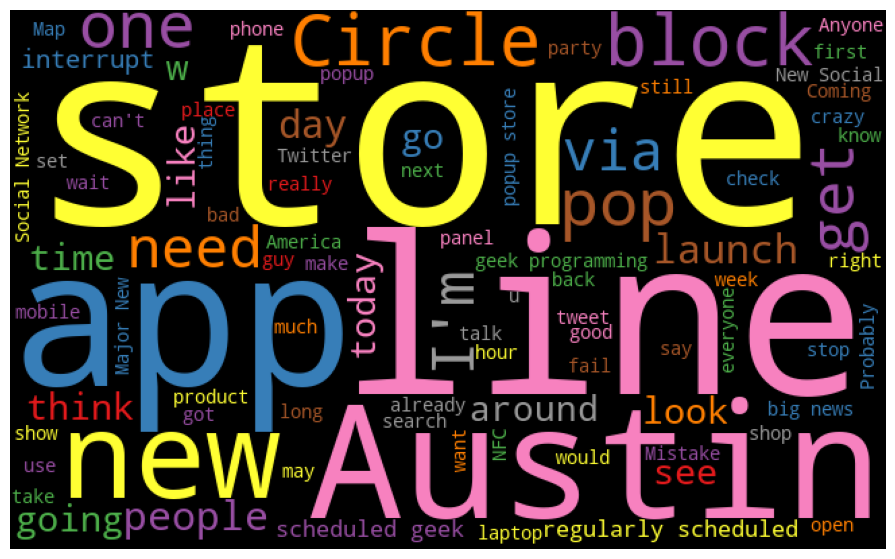

In [365]:
old_neg_wc=wordcloud_generator(text=old_negative['clean_text'], cmap='Set1', stopwords=None, min_font=12)#, title='Full Token List')
old_neg_wc

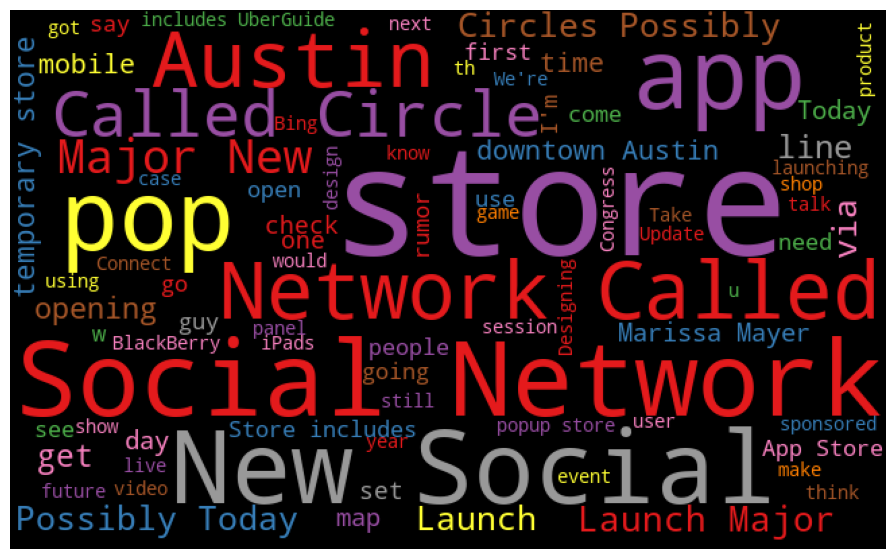

In [366]:
old_neut_wc=wordcloud_generator(text=old_neutral['clean_text'], cmap='Set1', stopwords=None, min_font=12)#, title='Full Token List')
old_neut_wc

### No Stop Words New Twitter

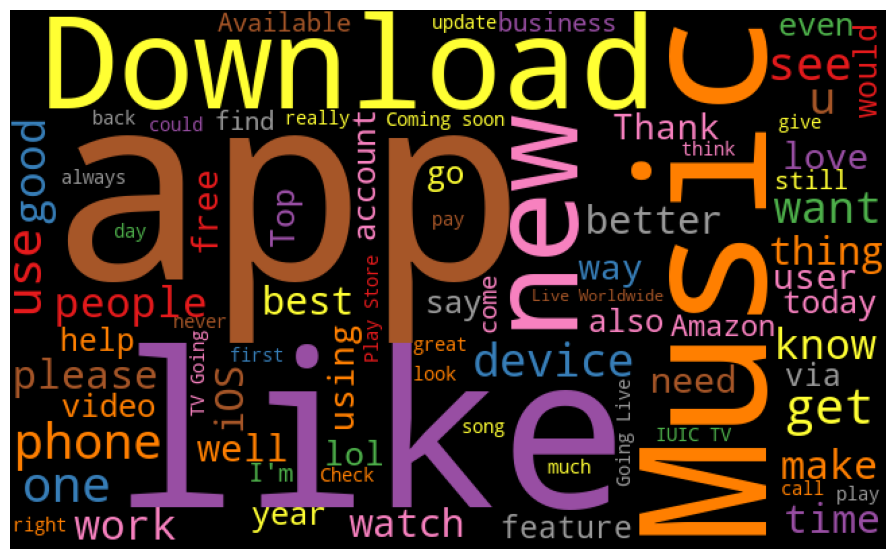

In [370]:
new_pos_wc=wordcloud_generator(text=new_positive['clean_text'], cmap='Set1', stopwords=None, min_font=12)#, title='Full Token List')
new_pos_wc

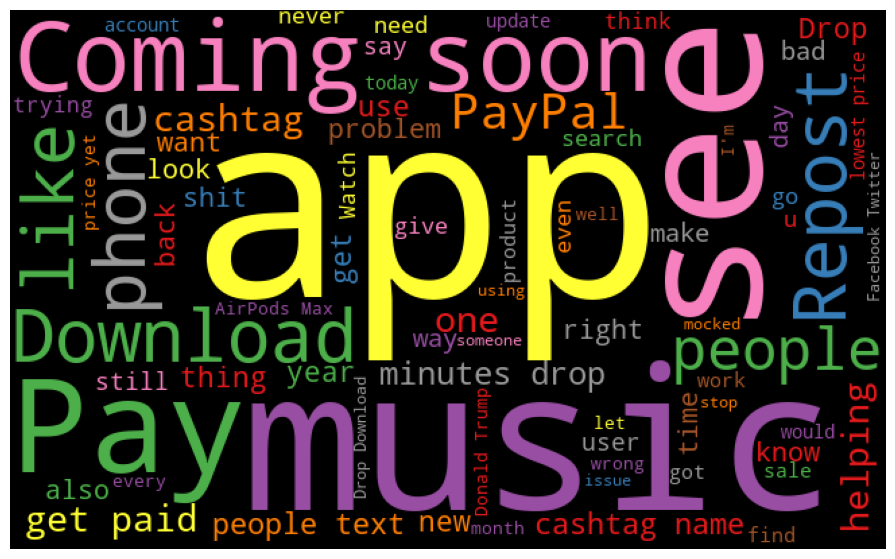

In [371]:
new_neg_wc=wordcloud_generator(text=new_negative['clean_text'], cmap='Set1', stopwords=None, min_font=12)#, title='Full Token List')
new_neg_wc

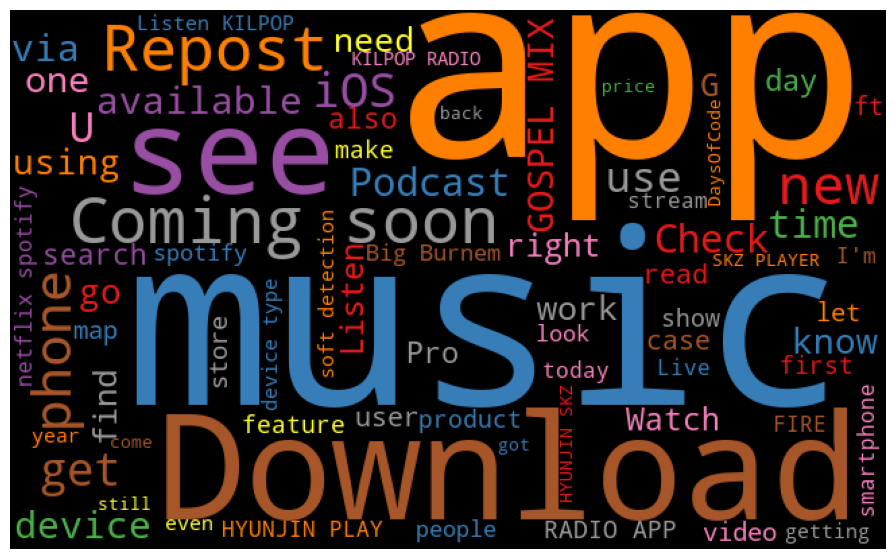

In [372]:
new_neut_wc=wordcloud_generator(text=new_neutral['clean_text'], cmap='Set1', stopwords=None, min_font=12)#, title='Full Token List')
new_neut_wc

### With Stop Words Old Twitter

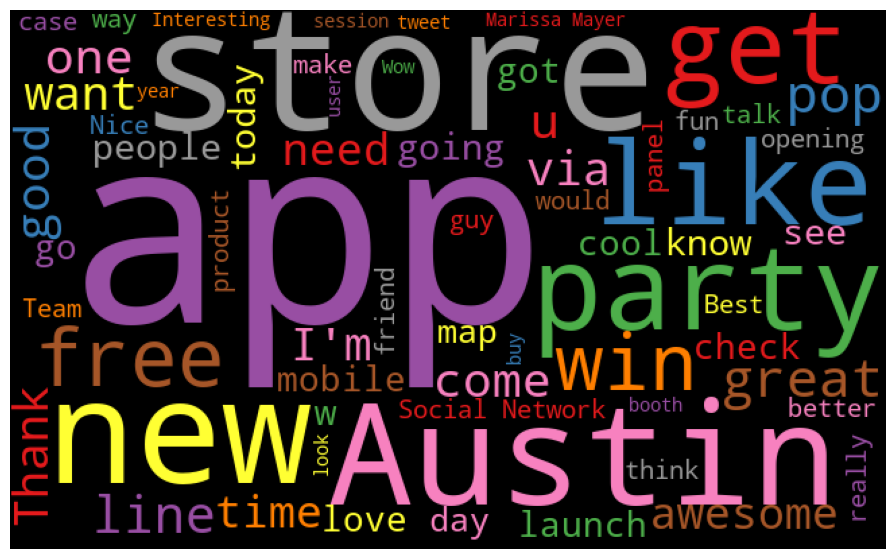

In [367]:
old_pos_wc=wordcloud_generator(text=old_positive['clean_text'], cmap='Set1', stopwords=wordcloud_stopwords, min_font=12)#, title='Full Token List')
old_pos_wc

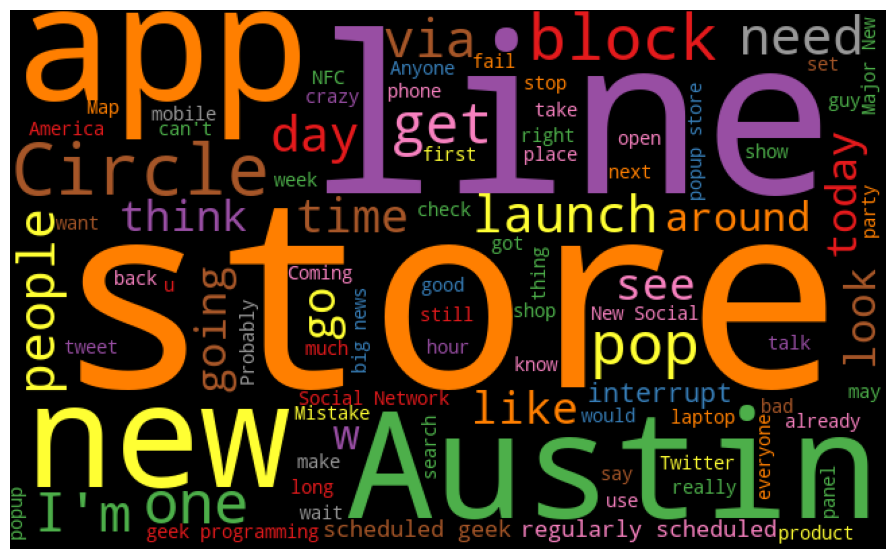

In [368]:
old_neg_wc=wordcloud_generator(text=old_negative['clean_text'], cmap='Set1', stopwords=wordcloud_stopwords, min_font=12)#, title='Full Token List')
old_neg_wc

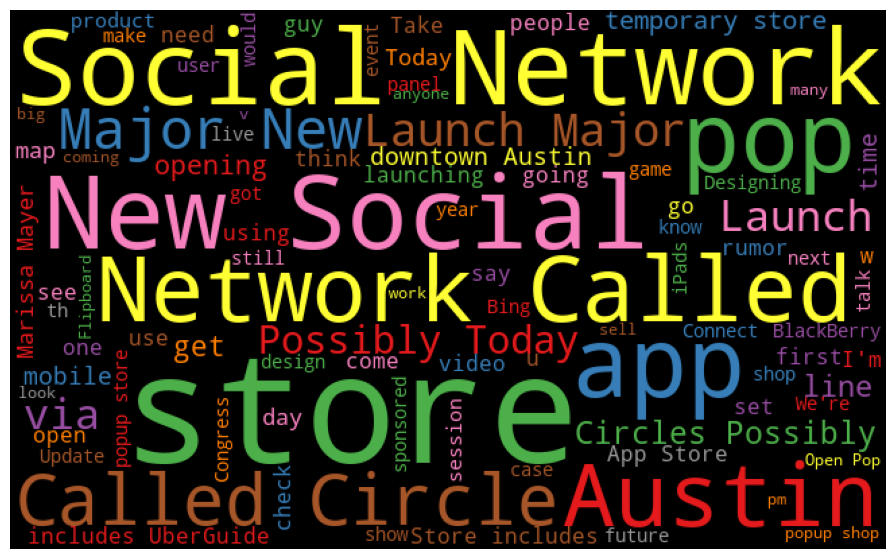

In [369]:
old_neut_wc=wordcloud_generator(text=old_neutral['clean_text'], cmap='Set1', stopwords=wordcloud_stopwords, min_font=12)#, title='Full Token List')
old_neut_wc

### With Stop Words New Twitter

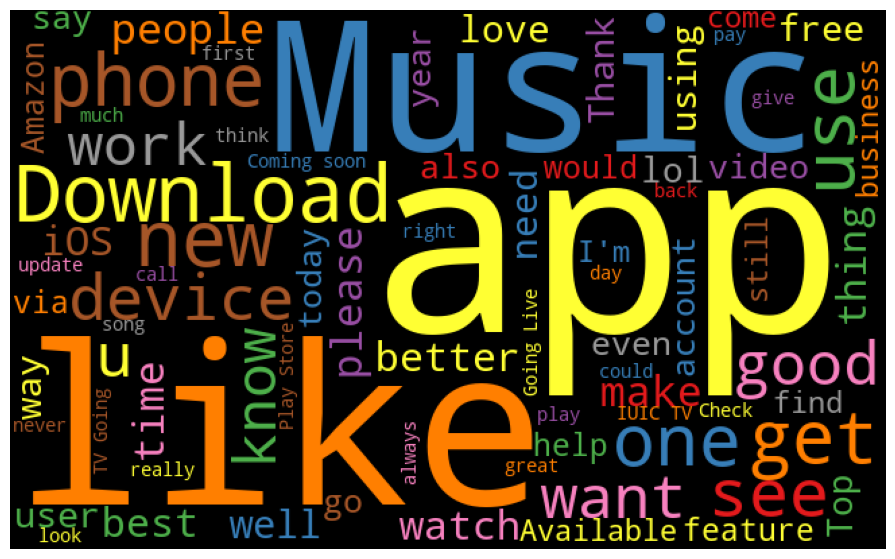

In [373]:
new_pos_wc=wordcloud_generator(text=new_positive['clean_text'], cmap='Set1', stopwords=wordcloud_stopwords, min_font=12)#, title='Full Token List')
new_pos_wc

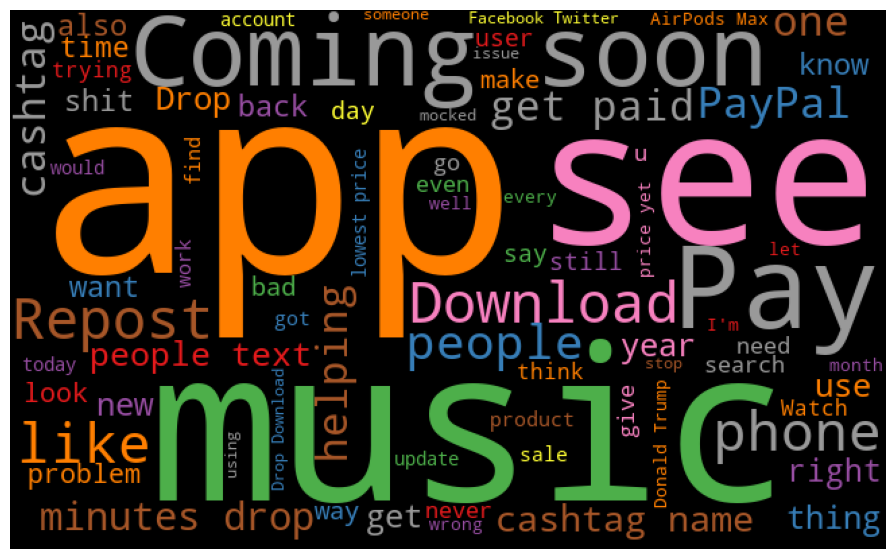

In [374]:
new_neg_wc=wordcloud_generator(text=new_negative['clean_text'], cmap='Set1', stopwords=wordcloud_stopwords, min_font=12)#, title='Full Token List')
new_neg_wc

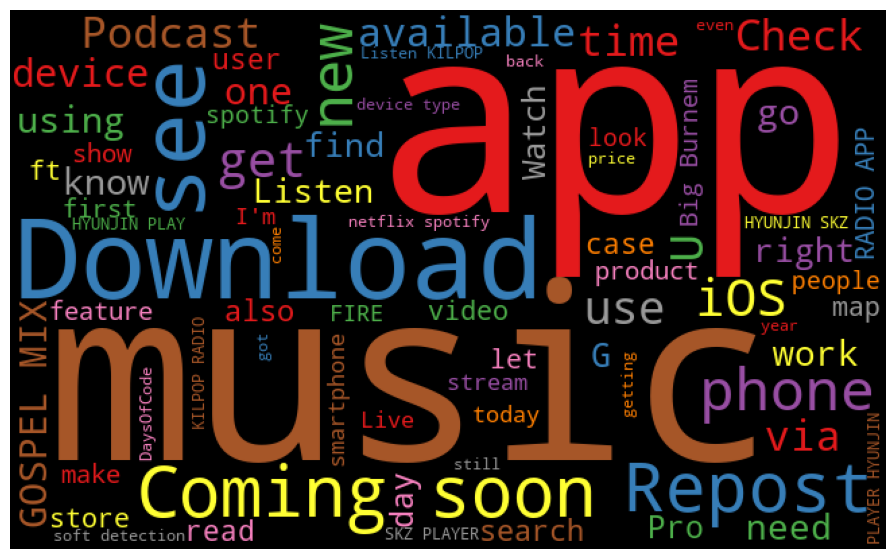

In [375]:
new_neut_wc=wordcloud_generator(text=new_neutral['clean_text'], cmap='Set1', stopwords=wordcloud_stopwords, min_font=12)#, title='Full Token List')
new_neut_wc

## Model Recommendation
For both of the tweets, the Random Forest models after the gridsearch performed the best. The random forest models before the pipeline and the models after performing the grid search performed similarly; however, because the low recall score for the negative tweets were improved to that of the original random forest models while maintaining the relatively high recall scores for the neutral and positive tweets, I recommend the **Random Forest models using gridsearch**.
As mentioned before, the number of tweets with negative sentiments were only a third of the size of either the positive or neutral neutral tweets which led to the poor recall rate of negative tweets for all models. 

## Conclusion
### Future Work
There are many things that I would like to incorporate into this project that I did not have the necessary skills or time to perform, but given the chance I would like to do these for the future:
1. Collect similar amounts of tweets for all three sentiments
    - This would help improve the recall scores for the models and maybe give an insight as to why the naive bayesian models did not perform as well before gridsearch.
2. Create a time line of sentiments and events.
    - By collecting tweets from the past throughout to the present, I would be able to show how the sentiment trends gradually changes.
    - Incorporating events from the past could also help understand the sentiment trends and highlight specific actions that the company had taken that negatively or positively impacted the public's sentiment.
3. Add the companies' earnings.
    - Adding the companies' earnings and comparing the relationship between the rate of increase in earnings to change in public sentiment shows a definitive reason to pay more attention to the public's wants/needs.
    - Adding a company that has continuously bettered its relationship with its end consumers and how their earnings have changed along with the public sentiment could show the difference that good public relationship can have on the company's earnings. 
<br> 
 <br>
 
### Final thoughts
This project was an adventure from the start as I had to learn how to collect my own data. Another aspect that I had not experienced before was the lengthy text cleaning that came with using tweets. And while the old tweet data were provided, I had to use the vader sentiment analysis as I had noticed much of the tweets did not correctly represent the tweet's sentiment. The aspect that most intrigued me about the Twitter sentiment towards these large companies is the obviously smaller number of negative emotion towards the companies and the overwhelming number of neutral sentiments towards them as well. I had initially expected to see a large increase in negative sentiment towards companies such as Apple as they have become less consumer friendly in their product designs. And as mentioned above in the future works section, I believe that creating a time line of the sentiment changes and events could help paint a clearer picture of how much these companies have changed in their policies and in the eyes of the consumers. 

# Dashboard

In [378]:
clean_old_df2.to_csv('old_twitter')
clean_new2.to_csv('new_twitter')

In [379]:
old_positive.to_csv('old_pos')
old_negative.to_csv('old_neg')
old_neutral.to_csv('old_neut')
new_positive.to_csv('new_pos')
new_negative.to_csv('new_neg')
new_neutral.to_csv('new_neut')

In [380]:
pd.DataFrame(wordcloud_stopwords).to_csv('wordcloud_stopwords')